In [36]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation
from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm
from sklearn import preprocessing

In [37]:
!pip install neupy

from neupy import utils
from neupy import algorithms, utils

In [38]:
iris = datasets.load_iris()
data = iris.data
features = iris.feature_names
iris_target = iris.target
classes = iris.target_names

In [39]:
df_iris = pd.DataFrame(data, columns=features)
df_iris["class_id"] = iris_target

df_iris.loc[df_iris["class_id"]==0, 'class'] = str(classes[0])
df_iris.loc[df_iris["class_id"]==1, 'class'] = str(classes[1])
df_iris.loc[df_iris["class_id"]==2, 'class'] = str(classes[2])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


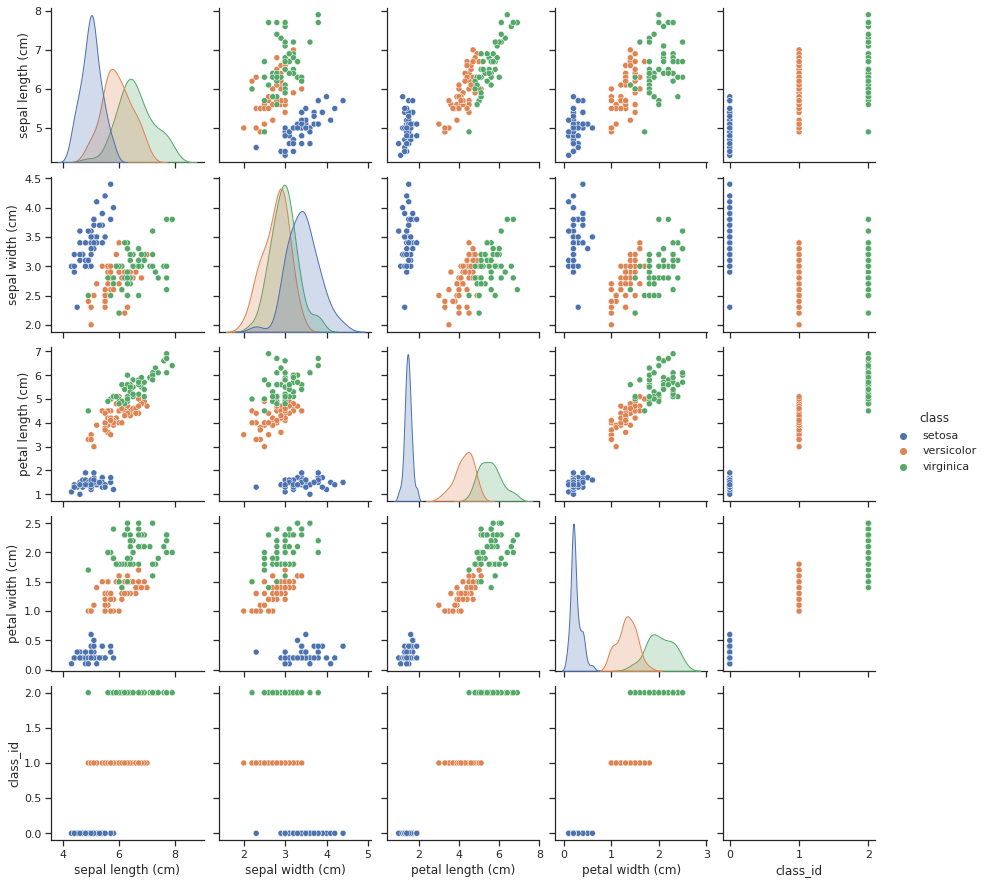

In [40]:
sns.set(style="ticks")
sns.pairplot(df_iris, hue="class")

In [41]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_id,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
iris_x = df_iris.filter(['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)'])
species = {'setosa': 0,'versicolor': 1,'virginica': 2}
iris_class = df_iris['class'].map(species)
iris_class = iris_class.to_numpy()

iris_x = preprocessing.scale(iris_x)
iris_x = pd.DataFrame(iris_x, columns = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)'])

iris_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [43]:
def create_gng(n_features, n_start_nodes, epsilon_b, epsilon_n, max_age, lambda_, beta, alpha, max_nodes, verbose = True):
    """
    Parâmetros
    ----------
        n_inputs : Número de classes no conjunto de dados
        n_start_nodes : Número de neurônios inicializados
        step (epsilon_b) : move o nó vencedor em epsilon_b vezes
        neighbour_step (epsilon_n) : move os nós vizinhos do nó vencedor epsilon_n vezes
        max_edge_age : remove arestas mais antigas que max_edge_age  
        n_iter_before_neuron_added (lambda) : a cada lambda iteração um novo nó é adicionado
        error_decay_rate (beta) : taxa de deicamento para todo nó
        after_split_error_decay_rate (alpha) : decaimento de erro após a inserção de novo nó
        max_nodes : Número máximo de nós a serem adicionados    
    """
    
    return algorithms.GrowingNeuralGas(
        n_inputs=n_features,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=verbose,

        step=epsilon_b,
        neighbour_step=epsilon_n,

        max_edge_age=max_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=lambda_,
        after_split_error_decay_rate=alpha,
        error_decay_rate=beta,
        min_distance_for_update=0.01,
    )

In [44]:
def create_model(model_df, list_gng_models, list_modes = [] ):

    for index in range(len(list_gng_models)):
            dict_info = pd.DataFrame.from_dict({'quantisation_error': list_gng_models[index].errors.train,
                                        'iterations': [i for i in range(1, len(list_gng_models[index].errors.train)+1)],
                                        'mode': [list_modes[index] for i in range(1, len(list_gng_models[index].errors.train)+1)],
                                        'error_min':[min(list_gng_models[index].errors.train) for i in range(1, len(list_gng_models[index].errors.train)+1)]
                                        })
            model_df = model_df.append(dict_info)
    return(model_df)

In [45]:
# Modelo 01
gng_model1 = create_gng(n_features = len(iris_x.columns),
                         n_start_nodes = 2,
                         epsilon_b = 10e-2,
                         epsilon_n = 10e-4,
                         max_age = 90,
                         lambda_ = 50,
                         beta = 0.005,
                         alpha = 0.5,
                         max_nodes = 500,
                         verbose=True)

gng_model1.train(iris_x, epochs=200)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.005
[OPTION] max_edge_age = 90
[OPTION] max_nodes = 500
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 4
[OPTION] n_iter_before_neuron_added = 50
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.001
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] verbose = True

#1 : [8 ms] train: 1.252453
#2 : [8 ms] train: 0.772827
#3 : [9 ms] train: 0.639590
#4 : [10 ms] train: 0.597779
#5 : [21 ms] train: 0.522302
#6 : [16 ms] train: 0.481771
#7 : [17 ms] train: 0.444483
#8 : [16 ms] train: 0.418742
#9 : [13 ms] train: 0.397494
#10 : [13 ms] train: 0.382063
#11 : [13 ms] train: 0.364695
#12 : [14 ms] train: 0.347564
#13 : [15 ms] train: 0.334573
#14 : [13 ms] train: 0.326867


#15 : [17 ms] train: 0.318659
#16 : [17 ms] train: 0.308860
#17 : [14 ms] train: 0.297662
#18 : [14 ms] train: 0.288754
#19 : [15 ms] train: 0.280151
#20 : [15 ms] train: 0.271293
#21 : [15 ms] train: 0.262885
#22 : [16 ms] train: 0.254415
#23 : [17 ms] train: 0.245155
#24 : [16 ms] train: 0.236866
#25 : [16 ms] train: 0.230497
#26 : [17 ms] train: 0.224368
#27 : [18 ms] train: 0.219104


#28 : [23 ms] train: 0.215135
#29 : [23 ms] train: 0.209711
#30 : [19 ms] train: 0.204363
#31 : [18 ms] train: 0.199801
#32 : [19 ms] train: 0.194775
#33 : [20 ms] train: 0.189340
#34 : [19 ms] train: 0.184980
#35 : [19 ms] train: 0.178195
#36 : [20 ms] train: 0.173831
#37 : [20 ms] train: 0.168874
#38 : [20 ms] train: 0.163998


#39 : [30 ms] train: 0.159956
#40 : [27 ms] train: 0.156019
#41 : [23 ms] train: 0.151943
#42 : [22 ms] train: 0.147968
#43 : [23 ms] train: 0.144408
#44 : [23 ms] train: 0.140261
#45 : [23 ms] train: 0.137547
#46 : [23 ms] train: 0.134292
#47 : [24 ms] train: 0.131364


#48 : [39 ms] train: 0.129040
#49 : [23 ms] train: 0.126561
#50 : [24 ms] train: 0.124086
#51 : [23 ms] train: 0.121998
#52 : [24 ms] train: 0.119875
#53 : [24 ms] train: 0.117474
#54 : [26 ms] train: 0.114513
#55 : [27 ms] train: 0.112420


#56 : [39 ms] train: 0.110240
#57 : [26 ms] train: 0.108227
#58 : [32 ms] train: 0.105577
#59 : [26 ms] train: 0.102917
#60 : [27 ms] train: 0.099780
#61 : [26 ms] train: 0.096570
#62 : [26 ms] train: 0.093726
#63 : [26 ms] train: 0.091266


#64 : [37 ms] train: 0.088955
#65 : [29 ms] train: 0.086438
#66 : [28 ms] train: 0.084092
#67 : [27 ms] train: 0.082119
#68 : [28 ms] train: 0.079709
#69 : [30 ms] train: 0.077355
#70 : [28 ms] train: 0.074836


#71 : [41 ms] train: 0.071906
#72 : [44 ms] train: 0.069154
#73 : [35 ms] train: 0.066402
#74 : [30 ms] train: 0.064261
#75 : [30 ms] train: 0.062210
#76 : [30 ms] train: 0.060417
#77 : [30 ms] train: 0.058746


#78 : [36 ms] train: 0.057133
#79 : [30 ms] train: 0.055154
#80 : [33 ms] train: 0.053110
#81 : [31 ms] train: 0.050925
#82 : [31 ms] train: 0.048738
#83 : [31 ms] train: 0.046904
#84 : [31 ms] train: 0.045227


#85 : [38 ms] train: 0.043672
#86 : [33 ms] train: 0.042258
#87 : [32 ms] train: 0.040860
#88 : [45 ms] train: 0.039234
#89 : [33 ms] train: 0.037758
#90 : [34 ms] train: 0.036407


#91 : [39 ms] train: 0.035198
#92 : [35 ms] train: 0.034081
#93 : [35 ms] train: 0.032996
#94 : [35 ms] train: 0.031814
#95 : [35 ms] train: 0.030779
#96 : [39 ms] train: 0.029848


#97 : [45 ms] train: 0.029026
#98 : [38 ms] train: 0.028030
#99 : [37 ms] train: 0.026994
#100 : [36 ms] train: 0.026144
#101 : [36 ms] train: 0.025039
#102 : [37 ms] train: 0.024141


#103 : [46 ms] train: 0.023352
#104 : [38 ms] train: 0.022642
#105 : [38 ms] train: 0.021983
#106 : [37 ms] train: 0.021431
#107 : [37 ms] train: 0.020871
#108 : [39 ms] train: 0.020412


#109 : [46 ms] train: 0.019807
#110 : [48 ms] train: 0.019266
#111 : [46 ms] train: 0.018785
#112 : [38 ms] train: 0.018356
#113 : [38 ms] train: 0.017965


#114 : [52 ms] train: 0.017616
#115 : [38 ms] train: 0.017235
#116 : [38 ms] train: 0.016788
#117 : [40 ms] train: 0.016282
#118 : [45 ms] train: 0.015712


#119 : [44 ms] train: 0.015157
#120 : [44 ms] train: 0.014459
#121 : [39 ms] train: 0.013828
#122 : [42 ms] train: 0.013258
#123 : [40 ms] train: 0.012741


#124 : [51 ms] train: 0.012282
#125 : [39 ms] train: 0.011735
#126 : [38 ms] train: 0.011143
#127 : [39 ms] train: 0.010460
#128 : [41 ms] train: 0.009793
#129 : [38 ms] train: 0.009186


#130 : [49 ms] train: 0.008642
#131 : [38 ms] train: 0.008148
#132 : [39 ms] train: 0.007419
#133 : [38 ms] train: 0.006897
#134 : [38 ms] train: 0.006421
#135 : [38 ms] train: 0.005991


#136 : [45 ms] train: 0.005601
#137 : [45 ms] train: 0.005254
#138 : [46 ms] train: 0.004938
#139 : [37 ms] train: 0.004481
#140 : [37 ms] train: 0.004138


#141 : [38 ms] train: 0.003648
#142 : [41 ms] train: 0.003307
#143 : [37 ms] train: 0.002994
#144 : [39 ms] train: 0.002715
#145 : [42 ms] train: 0.002462
#146 : [38 ms] train: 0.002235


#147 : [46 ms] train: 0.002031
#148 : [36 ms] train: 0.001847
#149 : [38 ms] train: 0.001681
#150 : [35 ms] train: 0.001532
#151 : [36 ms] train: 0.001398
#152 : [42 ms] train: 0.001276


#153 : [48 ms] train: 0.001169
#154 : [37 ms] train: 0.001066
#155 : [36 ms] train: 0.000975
#156 : [37 ms] train: 0.000892
#157 : [36 ms] train: 0.000816
#158 : [37 ms] train: 0.000750


#159 : [41 ms] train: 0.000688
#160 : [39 ms] train: 0.000635
#161 : [35 ms] train: 0.000586
#162 : [36 ms] train: 0.000542
#163 : [35 ms] train: 0.000503
#164 : [42 ms] train: 0.000468


#165 : [40 ms] train: 0.000436
#166 : [34 ms] train: 0.000408
#167 : [34 ms] train: 0.000382
#168 : [34 ms] train: 0.000360
#169 : [37 ms] train: 0.000340
#170 : [36 ms] train: 0.000322


#171 : [41 ms] train: 0.000306
#172 : [33 ms] train: 0.000291
#173 : [35 ms] train: 0.000278
#174 : [33 ms] train: 0.000267
#175 : [35 ms] train: 0.000257
#176 : [34 ms] train: 0.000248


#177 : [44 ms] train: 0.000240
#178 : [36 ms] train: 0.000232
#179 : [35 ms] train: 0.000226
#180 : [34 ms] train: 0.000217
#181 : [33 ms] train: 0.000208
#182 : [33 ms] train: 0.000199


#183 : [39 ms] train: 0.000191
#184 : [35 ms] train: 0.000185
#185 : [34 ms] train: 0.000179
#186 : [33 ms] train: 0.000173
#187 : [34 ms] train: 0.000169
#188 : [33 ms] train: 0.000164


#189 : [38 ms] train: 0.000161
#190 : [35 ms] train: 0.000157
#191 : [33 ms] train: 0.000154
#192 : [40 ms] train: 0.000151
#193 : [37 ms] train: 0.000149
#194 : [33 ms] train: 0.000146
#195 : [39 ms] train: 0.000142
#196 : [33 ms] train: 0.000139
#197 : [32 ms] train: 0.000136
#198 : [33 ms] train: 0.000134
#199 : [33 ms] train: 0.000131
#200 : [34 ms] train: 0.000126


In [46]:
# Modelo 02
gng_model2 = create_gng(n_features=len(iris_x.columns),
                           n_start_nodes=2,
                           epsilon_b=0.05,
                           epsilon_n=0.0006,
                           max_age=100,
                           lambda_=200,
                           beta=0.05,
                           alpha=0.5,
                           max_nodes=300,
                           verbose=True)

gng_model2.train(iris_x, epochs=2000)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.05
[OPTION] max_edge_age = 100
[OPTION] max_nodes = 300
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 4
[OPTION] n_iter_before_neuron_added = 200
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.0006
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.05
[OPTION] verbose = True

#1 : [11 ms] train: 1.105324
#2 : [13 ms] train: 0.991351
#3 : [15 ms] train: 0.891023
#4 : [17 ms] train: 0.869053
#5 : [10 ms] train: 0.759641
#6 : [7 ms] train: 0.700584
#7 : [7 ms] train: 0.666618
#8 : [8 ms] train: 0.667755
#9 : [8 ms] train: 0.625616
#10 : [8 ms] train: 0.610346
#11 : [10 ms] train: 0.596538
#12 : [12 ms] train: 0.583392
#13 : [16 ms] train: 0.575826
#14 : [20 ms] train: 0.561045
#15 : [13 ms] train: 0.545899
#16 : [11 ms] train: 0.532394
#17 : [10 ms] train: 0.518698
#18 : [10 ms] train: 0.501997
#19 : [1

#21 : [18 ms] train: 0.464496


#22 : [20 ms] train: 0.454832
#23 : [18 ms] train: 0.444376
#24 : [10 ms] train: 0.436160
#25 : [11 ms] train: 0.431803
#26 : [11 ms] train: 0.422241
#27 : [13 ms] train: 0.415570
#28 : [10 ms] train: 0.409760
#29 : [10 ms] train: 0.402268
#30 : [10 ms] train: 0.395901
#31 : [10 ms] train: 0.387086
#32 : [10 ms] train: 0.375096
#33 : [10 ms] train: 0.369326
#34 : [10 ms] train: 0.362852
#35 : [13 ms] train: 0.358354
#36 : [13 ms] train: 0.356356
#37 : [12 ms] train: 0.353177
#38 : [15 ms] train: 0.349180


#39 : [23 ms] train: 0.345793


#40 : [22 ms] train: 0.340350
#41 : [12 ms] train: 0.335376
#42 : [17 ms] train: 0.330962
#43 : [12 ms] train: 0.327777
#44 : [13 ms] train: 0.323947
#45 : [13 ms] train: 0.320749
#46 : [17 ms] train: 0.319374
#47 : [13 ms] train: 0.314816
#48 : [12 ms] train: 0.313145
#49 : [12 ms] train: 0.311145
#50 : [14 ms] train: 0.309227
#51 : [12 ms] train: 0.307208
#52 : [15 ms] train: 0.303577
#53 : [15 ms] train: 0.298812


#54 : [22 ms] train: 0.296012
#55 : [17 ms] train: 0.292549
#56 : [15 ms] train: 0.290098
#57 : [13 ms] train: 0.287148
#58 : [14 ms] train: 0.284295
#59 : [16 ms] train: 0.282566
#60 : [14 ms] train: 0.279661
#61 : [13 ms] train: 0.276518
#62 : [14 ms] train: 0.274432
#63 : [14 ms] train: 0.272892
#64 : [13 ms] train: 0.271253
#65 : [14 ms] train: 0.269848
#66 : [12 ms] train: 0.268124
#67 : [13 ms] train: 0.267511
#68 : [13 ms] train: 0.266063


#69 : [20 ms] train: 0.263585
#70 : [14 ms] train: 0.260806
#71 : [13 ms] train: 0.258080
#72 : [14 ms] train: 0.254497
#73 : [13 ms] train: 0.253053
#74 : [13 ms] train: 0.251129
#75 : [13 ms] train: 0.246783
#76 : [14 ms] train: 0.242651
#77 : [15 ms] train: 0.239382
#78 : [14 ms] train: 0.236807
#79 : [14 ms] train: 0.234817
#80 : [17 ms] train: 0.232128
#81 : [16 ms] train: 0.229015
#82 : [15 ms] train: 0.226843


#83 : [19 ms] train: 0.224067
#84 : [16 ms] train: 0.221494
#85 : [15 ms] train: 0.218209
#86 : [14 ms] train: 0.215434
#87 : [15 ms] train: 0.213116
#88 : [15 ms] train: 0.211248
#89 : [15 ms] train: 0.209730
#90 : [15 ms] train: 0.208253
#91 : [15 ms] train: 0.204446
#92 : [15 ms] train: 0.202854
#93 : [15 ms] train: 0.200891
#94 : [15 ms] train: 0.199257
#95 : [15 ms] train: 0.197582
#96 : [15 ms] train: 0.195866


#97 : [24 ms] train: 0.194330
#98 : [20 ms] train: 0.191677
#99 : [18 ms] train: 0.190466
#100 : [17 ms] train: 0.188872
#101 : [17 ms] train: 0.187846
#102 : [19 ms] train: 0.186708
#103 : [17 ms] train: 0.184796
#104 : [16 ms] train: 0.184001
#105 : [16 ms] train: 0.182875
#106 : [16 ms] train: 0.181794
#107 : [16 ms] train: 0.180537
#108 : [16 ms] train: 0.179664


#109 : [25 ms] train: 0.178061
#110 : [17 ms] train: 0.177016
#111 : [17 ms] train: 0.175498
#112 : [18 ms] train: 0.174292
#113 : [19 ms] train: 0.173408
#114 : [17 ms] train: 0.172240
#115 : [16 ms] train: 0.170854
#116 : [17 ms] train: 0.169509
#117 : [16 ms] train: 0.168567
#118 : [17 ms] train: 0.166898
#119 : [24 ms] train: 0.165883
#120 : [17 ms] train: 0.165083


#121 : [24 ms] train: 0.163724
#122 : [16 ms] train: 0.162622
#123 : [17 ms] train: 0.161818
#124 : [17 ms] train: 0.160889
#125 : [17 ms] train: 0.160438
#126 : [19 ms] train: 0.159469
#127 : [20 ms] train: 0.158026
#128 : [20 ms] train: 0.157756
#129 : [18 ms] train: 0.156377
#130 : [17 ms] train: 0.155429
#131 : [17 ms] train: 0.154785
#132 : [17 ms] train: 0.153851


#133 : [24 ms] train: 0.153149
#134 : [19 ms] train: 0.151916
#135 : [18 ms] train: 0.151107
#136 : [18 ms] train: 0.150181
#137 : [17 ms] train: 0.149706
#138 : [18 ms] train: 0.149262
#139 : [20 ms] train: 0.148367
#140 : [20 ms] train: 0.147323
#141 : [18 ms] train: 0.146274
#142 : [18 ms] train: 0.145415
#143 : [19 ms] train: 0.144318


#144 : [25 ms] train: 0.142954
#145 : [19 ms] train: 0.141983
#146 : [18 ms] train: 0.140884
#147 : [18 ms] train: 0.139893
#148 : [18 ms] train: 0.138664
#149 : [18 ms] train: 0.137279
#150 : [19 ms] train: 0.136275
#151 : [18 ms] train: 0.134611
#152 : [20 ms] train: 0.133906
#153 : [21 ms] train: 0.132947
#154 : [19 ms] train: 0.131577


#155 : [26 ms] train: 0.130923
#156 : [20 ms] train: 0.129884
#157 : [19 ms] train: 0.128901
#158 : [19 ms] train: 0.127810
#159 : [19 ms] train: 0.127086
#160 : [19 ms] train: 0.126014
#161 : [19 ms] train: 0.125099
#162 : [19 ms] train: 0.124123
#163 : [20 ms] train: 0.122956
#164 : [21 ms] train: 0.121849
#165 : [21 ms] train: 0.120890


#166 : [30 ms] train: 0.119978
#167 : [20 ms] train: 0.118866
#168 : [20 ms] train: 0.118241
#169 : [21 ms] train: 0.117648
#170 : [28 ms] train: 0.116035
#171 : [21 ms] train: 0.115334
#172 : [20 ms] train: 0.114546
#173 : [21 ms] train: 0.113858
#174 : [20 ms] train: 0.113278
#175 : [21 ms] train: 0.112806


#176 : [28 ms] train: 0.112144
#177 : [23 ms] train: 0.111119
#178 : [28 ms] train: 0.109980
#179 : [26 ms] train: 0.109607
#180 : [25 ms] train: 0.108935
#181 : [21 ms] train: 0.108165
#182 : [24 ms] train: 0.108154
#183 : [21 ms] train: 0.107184
#184 : [21 ms] train: 0.106748


#185 : [29 ms] train: 0.106242
#186 : [21 ms] train: 0.105891
#187 : [23 ms] train: 0.105084
#188 : [22 ms] train: 0.104309
#189 : [21 ms] train: 0.103176
#190 : [22 ms] train: 0.102168
#191 : [22 ms] train: 0.101207
#192 : [22 ms] train: 0.100161
#193 : [22 ms] train: 0.098007
#194 : [21 ms] train: 0.097115


#195 : [29 ms] train: 0.096206
#196 : [23 ms] train: 0.095410
#197 : [23 ms] train: 0.094643
#198 : [24 ms] train: 0.093967
#199 : [25 ms] train: 0.093270
#200 : [22 ms] train: 0.092582
#201 : [22 ms] train: 0.091856
#202 : [23 ms] train: 0.091110
#203 : [23 ms] train: 0.090638


#204 : [32 ms] train: 0.090046
#205 : [25 ms] train: 0.089569
#206 : [22 ms] train: 0.088939
#207 : [23 ms] train: 0.088514
#208 : [24 ms] train: 0.088161
#209 : [22 ms] train: 0.087737
#210 : [23 ms] train: 0.087307
#211 : [26 ms] train: 0.086525
#212 : [24 ms] train: 0.085963


#213 : [38 ms] train: 0.085476
#214 : [24 ms] train: 0.085022
#215 : [23 ms] train: 0.084490
#216 : [23 ms] train: 0.084000
#217 : [24 ms] train: 0.083312
#218 : [26 ms] train: 0.082744
#219 : [25 ms] train: 0.082165
#220 : [24 ms] train: 0.081463
#221 : [24 ms] train: 0.080916


#222 : [30 ms] train: 0.080422
#223 : [27 ms] train: 0.079970
#224 : [27 ms] train: 0.079196
#225 : [24 ms] train: 0.078627
#226 : [24 ms] train: 0.077324
#227 : [24 ms] train: 0.076810
#228 : [24 ms] train: 0.076354
#229 : [24 ms] train: 0.075886


#230 : [28 ms] train: 0.075493
#231 : [28 ms] train: 0.074968
#232 : [24 ms] train: 0.074405
#233 : [28 ms] train: 0.073767
#234 : [26 ms] train: 0.073182
#235 : [25 ms] train: 0.072599
#236 : [25 ms] train: 0.072061
#237 : [27 ms] train: 0.071421


#238 : [34 ms] train: 0.070809
#239 : [27 ms] train: 0.070240
#240 : [26 ms] train: 0.069707
#241 : [26 ms] train: 0.069151
#242 : [26 ms] train: 0.068609
#243 : [26 ms] train: 0.067999
#244 : [28 ms] train: 0.067346
#245 : [30 ms] train: 0.066564


#246 : [36 ms] train: 0.065829
#247 : [27 ms] train: 0.065198
#248 : [25 ms] train: 0.064484
#249 : [25 ms] train: 0.063757
#250 : [29 ms] train: 0.063017
#251 : [33 ms] train: 0.062348
#252 : [30 ms] train: 0.061757
#253 : [25 ms] train: 0.061132


#254 : [32 ms] train: 0.060604
#255 : [25 ms] train: 0.060063
#256 : [25 ms] train: 0.059566
#257 : [26 ms] train: 0.059147
#258 : [28 ms] train: 0.058731
#259 : [26 ms] train: 0.058264
#260 : [27 ms] train: 0.057863
#261 : [28 ms] train: 0.057523


#262 : [36 ms] train: 0.057160
#263 : [26 ms] train: 0.056844
#264 : [26 ms] train: 0.056533
#265 : [26 ms] train: 0.056164
#266 : [27 ms] train: 0.055841
#267 : [27 ms] train: 0.055522
#268 : [26 ms] train: 0.055099
#269 : [26 ms] train: 0.054739


#270 : [36 ms] train: 0.054383
#271 : [31 ms] train: 0.054046
#272 : [29 ms] train: 0.053768
#273 : [25 ms] train: 0.053111
#274 : [25 ms] train: 0.052708
#275 : [27 ms] train: 0.052345
#276 : [26 ms] train: 0.051842
#277 : [26 ms] train: 0.051465


#278 : [33 ms] train: 0.050932
#279 : [30 ms] train: 0.050389
#280 : [27 ms] train: 0.049900
#281 : [26 ms] train: 0.049439
#282 : [27 ms] train: 0.048996
#283 : [26 ms] train: 0.048552
#284 : [26 ms] train: 0.048168
#285 : [28 ms] train: 0.047786


#286 : [42 ms] train: 0.047458
#287 : [31 ms] train: 0.047056
#288 : [29 ms] train: 0.046664
#289 : [28 ms] train: 0.046283
#290 : [27 ms] train: 0.045912
#291 : [27 ms] train: 0.045522
#292 : [26 ms] train: 0.045188
#293 : [26 ms] train: 0.044843


#294 : [32 ms] train: 0.044474
#295 : [28 ms] train: 0.044117
#296 : [29 ms] train: 0.043776
#297 : [32 ms] train: 0.043437
#298 : [31 ms] train: 0.043129
#299 : [31 ms] train: 0.042832
#300 : [31 ms] train: 0.042555


#301 : [35 ms] train: 0.042306
#302 : [27 ms] train: 0.042050
#303 : [27 ms] train: 0.041791
#304 : [27 ms] train: 0.041502
#305 : [27 ms] train: 0.041146
#306 : [27 ms] train: 0.040714
#307 : [28 ms] train: 0.040325
#308 : [31 ms] train: 0.039772


#309 : [34 ms] train: 0.039042
#310 : [26 ms] train: 0.038481
#311 : [27 ms] train: 0.037831
#312 : [26 ms] train: 0.037235
#313 : [27 ms] train: 0.036672
#314 : [26 ms] train: 0.036142
#315 : [27 ms] train: 0.035633
#316 : [32 ms] train: 0.035142


#317 : [32 ms] train: 0.034665
#318 : [27 ms] train: 0.034226
#319 : [27 ms] train: 0.033756
#320 : [27 ms] train: 0.033285
#321 : [26 ms] train: 0.032818
#322 : [34 ms] train: 0.032288
#323 : [27 ms] train: 0.031663


#324 : [31 ms] train: 0.031070
#325 : [35 ms] train: 0.030502
#326 : [29 ms] train: 0.029958
#327 : [26 ms] train: 0.029457
#328 : [27 ms] train: 0.028971
#329 : [28 ms] train: 0.028518
#330 : [26 ms] train: 0.028082
#331 : [28 ms] train: 0.027676


#332 : [33 ms] train: 0.027283
#333 : [32 ms] train: 0.026918
#334 : [27 ms] train: 0.026565
#335 : [28 ms] train: 0.026225
#336 : [28 ms] train: 0.025904
#337 : [28 ms] train: 0.025602
#338 : [28 ms] train: 0.025152
#339 : [28 ms] train: 0.024680


#340 : [35 ms] train: 0.024203
#341 : [26 ms] train: 0.023668
#342 : [27 ms] train: 0.023167
#343 : [27 ms] train: 0.022686
#344 : [29 ms] train: 0.022230
#345 : [30 ms] train: 0.021798
#346 : [28 ms] train: 0.021389
#347 : [28 ms] train: 0.020969


#348 : [36 ms] train: 0.020522
#349 : [29 ms] train: 0.020097
#350 : [28 ms] train: 0.019692
#351 : [28 ms] train: 0.019305
#352 : [34 ms] train: 0.018934
#353 : [34 ms] train: 0.018476
#354 : [31 ms] train: 0.018064


#355 : [36 ms] train: 0.017671
#356 : [34 ms] train: 0.017301
#357 : [28 ms] train: 0.016944
#358 : [29 ms] train: 0.016595
#359 : [29 ms] train: 0.016236
#360 : [28 ms] train: 0.015892
#361 : [32 ms] train: 0.015571


#362 : [34 ms] train: 0.015260
#363 : [28 ms] train: 0.014960
#364 : [27 ms] train: 0.014673
#365 : [27 ms] train: 0.014402
#366 : [27 ms] train: 0.014145
#367 : [27 ms] train: 0.013901
#368 : [27 ms] train: 0.013669
#369 : [28 ms] train: 0.013449


#370 : [39 ms] train: 0.013237
#371 : [28 ms] train: 0.013040
#372 : [29 ms] train: 0.012849
#373 : [28 ms] train: 0.012668
#374 : [29 ms] train: 0.012495
#375 : [42 ms] train: 0.012329
#376 : [28 ms] train: 0.012173


#377 : [36 ms] train: 0.012022
#378 : [32 ms] train: 0.011881
#379 : [31 ms] train: 0.011747
#380 : [28 ms] train: 0.011619
#381 : [28 ms] train: 0.011497
#382 : [28 ms] train: 0.011379
#383 : [28 ms] train: 0.011268


#384 : [32 ms] train: 0.011162
#385 : [30 ms] train: 0.011062
#386 : [29 ms] train: 0.010968
#387 : [27 ms] train: 0.010877
#388 : [27 ms] train: 0.010791
#389 : [36 ms] train: 0.010710
#390 : [31 ms] train: 0.010633


#391 : [35 ms] train: 0.010560
#392 : [28 ms] train: 0.010490
#393 : [27 ms] train: 0.010425
#394 : [27 ms] train: 0.010363
#395 : [27 ms] train: 0.010304
#396 : [27 ms] train: 0.010245
#397 : [31 ms] train: 0.010190


#398 : [35 ms] train: 0.010138
#399 : [35 ms] train: 0.010085
#400 : [28 ms] train: 0.010038
#401 : [29 ms] train: 0.009989
#402 : [27 ms] train: 0.009942
#403 : [27 ms] train: 0.009898
#404 : [28 ms] train: 0.009857
#405 : [28 ms] train: 0.009802


#406 : [35 ms] train: 0.009710
#407 : [27 ms] train: 0.009623
#408 : [30 ms] train: 0.009475
#409 : [28 ms] train: 0.009268
#410 : [27 ms] train: 0.009072
#411 : [26 ms] train: 0.008600
#412 : [26 ms] train: 0.008365
#413 : [26 ms] train: 0.008143


#414 : [32 ms] train: 0.007932
#415 : [29 ms] train: 0.007732
#416 : [28 ms] train: 0.007542
#417 : [27 ms] train: 0.007361
#418 : [33 ms] train: 0.007190
#419 : [26 ms] train: 0.007025
#420 : [27 ms] train: 0.006869
#421 : [26 ms] train: 0.006720


#422 : [35 ms] train: 0.006579
#423 : [26 ms] train: 0.006444
#424 : [34 ms] train: 0.006315
#425 : [26 ms] train: 0.006192
#426 : [28 ms] train: 0.006065
#427 : [30 ms] train: 0.005892
#428 : [27 ms] train: 0.005727
#429 : [27 ms] train: 0.005572


#430 : [33 ms] train: 0.005423
#431 : [27 ms] train: 0.005240
#432 : [26 ms] train: 0.005061
#433 : [25 ms] train: 0.004890
#434 : [26 ms] train: 0.004727
#435 : [26 ms] train: 0.004571
#436 : [26 ms] train: 0.004424
#437 : [26 ms] train: 0.004284


#438 : [36 ms] train: 0.004151
#439 : [26 ms] train: 0.004024
#440 : [26 ms] train: 0.003904
#441 : [28 ms] train: 0.003791
#442 : [25 ms] train: 0.003682
#443 : [26 ms] train: 0.003576
#444 : [26 ms] train: 0.003476
#445 : [26 ms] train: 0.003382


#446 : [32 ms] train: 0.003292
#447 : [26 ms] train: 0.003207
#448 : [25 ms] train: 0.003124
#449 : [25 ms] train: 0.002986
#450 : [29 ms] train: 0.002856
#451 : [26 ms] train: 0.002731
#452 : [26 ms] train: 0.002614
#453 : [25 ms] train: 0.002502


#454 : [32 ms] train: 0.002395
#455 : [25 ms] train: 0.002295
#456 : [25 ms] train: 0.002198
#457 : [25 ms] train: 0.002105
#458 : [25 ms] train: 0.002019
#459 : [25 ms] train: 0.001936
#460 : [34 ms] train: 0.001854
#461 : [37 ms] train: 0.001776


#462 : [34 ms] train: 0.001701
#463 : [25 ms] train: 0.001630
#464 : [26 ms] train: 0.001563
#465 : [27 ms] train: 0.001498
#466 : [29 ms] train: 0.001437
#467 : [25 ms] train: 0.001380
#468 : [27 ms] train: 0.001325
#469 : [30 ms] train: 0.001274


#470 : [30 ms] train: 0.001224
#471 : [27 ms] train: 0.001178
#472 : [26 ms] train: 0.001133
#473 : [29 ms] train: 0.001090
#474 : [25 ms] train: 0.001050
#475 : [25 ms] train: 0.001013
#476 : [25 ms] train: 0.000977
#477 : [25 ms] train: 0.000943


#478 : [35 ms] train: 0.000910
#479 : [28 ms] train: 0.000878
#480 : [25 ms] train: 0.000848
#481 : [25 ms] train: 0.000819
#482 : [25 ms] train: 0.000791
#483 : [25 ms] train: 0.000764
#484 : [25 ms] train: 0.000739
#485 : [26 ms] train: 0.000716


#486 : [30 ms] train: 0.000693
#487 : [27 ms] train: 0.000672
#488 : [26 ms] train: 0.000652
#489 : [25 ms] train: 0.000633
#490 : [24 ms] train: 0.000614
#491 : [26 ms] train: 0.000597
#492 : [26 ms] train: 0.000580
#493 : [27 ms] train: 0.000565


#494 : [30 ms] train: 0.000550
#495 : [24 ms] train: 0.000534
#496 : [24 ms] train: 0.000521
#497 : [24 ms] train: 0.000507
#498 : [32 ms] train: 0.000495
#499 : [25 ms] train: 0.000484
#500 : [24 ms] train: 0.000473
#501 : [24 ms] train: 0.000462


#502 : [30 ms] train: 0.000451
#503 : [27 ms] train: 0.000442
#504 : [27 ms] train: 0.000433
#505 : [24 ms] train: 0.000424
#506 : [24 ms] train: 0.000416
#507 : [24 ms] train: 0.000409
#508 : [24 ms] train: 0.000402
#509 : [26 ms] train: 0.000394


#510 : [27 ms] train: 0.000386
#511 : [32 ms] train: 0.000379
#512 : [25 ms] train: 0.000372
#513 : [25 ms] train: 0.000366
#514 : [24 ms] train: 0.000359
#515 : [24 ms] train: 0.000354
#516 : [24 ms] train: 0.000348
#517 : [25 ms] train: 0.000343
#518 : [24 ms] train: 0.000337


#519 : [35 ms] train: 0.000333
#520 : [26 ms] train: 0.000328
#521 : [25 ms] train: 0.000324
#522 : [24 ms] train: 0.000320
#523 : [26 ms] train: 0.000316
#524 : [24 ms] train: 0.000313
#525 : [25 ms] train: 0.000309
#526 : [24 ms] train: 0.000306
#527 : [25 ms] train: 0.000303


#528 : [31 ms] train: 0.000298
#529 : [31 ms] train: 0.000295
#530 : [28 ms] train: 0.000292
#531 : [30 ms] train: 0.000288
#532 : [25 ms] train: 0.000284
#533 : [24 ms] train: 0.000282
#534 : [24 ms] train: 0.000278
#535 : [24 ms] train: 0.000275


#536 : [39 ms] train: 0.000273
#537 : [27 ms] train: 0.000270
#538 : [26 ms] train: 0.000266
#539 : [24 ms] train: 0.000262
#540 : [25 ms] train: 0.000259
#541 : [25 ms] train: 0.000254
#542 : [24 ms] train: 0.000251
#543 : [25 ms] train: 0.000249


#544 : [26 ms] train: 0.000245
#545 : [28 ms] train: 0.000242
#546 : [24 ms] train: 0.000240
#547 : [24 ms] train: 0.000238
#548 : [24 ms] train: 0.000235
#549 : [26 ms] train: 0.000233
#550 : [27 ms] train: 0.000231
#551 : [27 ms] train: 0.000228


#552 : [33 ms] train: 0.000226
#553 : [26 ms] train: 0.000225
#554 : [24 ms] train: 0.000223
#555 : [24 ms] train: 0.000222
#556 : [24 ms] train: 0.000220
#557 : [24 ms] train: 0.000218
#558 : [24 ms] train: 0.000217
#559 : [24 ms] train: 0.000215
#560 : [26 ms] train: 0.000215


#561 : [33 ms] train: 0.000213
#562 : [25 ms] train: 0.000212
#563 : [24 ms] train: 0.000211
#564 : [24 ms] train: 0.000210
#565 : [23 ms] train: 0.000209
#566 : [24 ms] train: 0.000209
#567 : [24 ms] train: 0.000207
#568 : [23 ms] train: 0.000207
#569 : [24 ms] train: 0.000206


#570 : [34 ms] train: 0.000206
#571 : [24 ms] train: 0.000205
#572 : [25 ms] train: 0.000204
#573 : [24 ms] train: 0.000204
#574 : [24 ms] train: 0.000203
#575 : [30 ms] train: 0.000203
#576 : [25 ms] train: 0.000203
#577 : [23 ms] train: 0.000202


#578 : [25 ms] train: 0.000202
#579 : [32 ms] train: 0.000201
#580 : [28 ms] train: 0.000201
#581 : [24 ms] train: 0.000200
#582 : [25 ms] train: 0.000200
#583 : [24 ms] train: 0.000200
#584 : [24 ms] train: 0.000200
#585 : [24 ms] train: 0.000199
#586 : [24 ms] train: 0.000200


#587 : [30 ms] train: 0.000199
#588 : [24 ms] train: 0.000199
#589 : [31 ms] train: 0.000199
#590 : [30 ms] train: 0.000199
#591 : [28 ms] train: 0.000199
#592 : [26 ms] train: 0.000198
#593 : [23 ms] train: 0.000198
#594 : [23 ms] train: 0.000199


#595 : [31 ms] train: 0.000198
#596 : [25 ms] train: 0.000199
#597 : [26 ms] train: 0.000198
#598 : [26 ms] train: 0.000198
#599 : [24 ms] train: 0.000198
#600 : [23 ms] train: 0.000198
#601 : [23 ms] train: 0.000198
#602 : [23 ms] train: 0.000198
#603 : [25 ms] train: 0.000198


#604 : [30 ms] train: 0.000198
#605 : [24 ms] train: 0.000198
#606 : [25 ms] train: 0.000197
#607 : [28 ms] train: 0.000198
#608 : [25 ms] train: 0.000198
#609 : [23 ms] train: 0.000198
#610 : [23 ms] train: 0.000198
#611 : [23 ms] train: 0.000197
#612 : [23 ms] train: 0.000198


#613 : [30 ms] train: 0.000197
#614 : [35 ms] train: 0.000198
#615 : [25 ms] train: 0.000198
#616 : [26 ms] train: 0.000198
#617 : [24 ms] train: 0.000198
#618 : [25 ms] train: 0.000198
#619 : [24 ms] train: 0.000198
#620 : [23 ms] train: 0.000198


#621 : [32 ms] train: 0.000198
#622 : [25 ms] train: 0.000198
#623 : [24 ms] train: 0.000197
#624 : [23 ms] train: 0.000197
#625 : [24 ms] train: 0.000198
#626 : [24 ms] train: 0.000197
#627 : [23 ms] train: 0.000198
#628 : [25 ms] train: 0.000198
#629 : [26 ms] train: 0.000198


#630 : [29 ms] train: 0.000198
#631 : [34 ms] train: 0.000198
#632 : [37 ms] train: 0.000198
#633 : [23 ms] train: 0.000198
#634 : [23 ms] train: 0.000197
#635 : [23 ms] train: 0.000198
#636 : [23 ms] train: 0.000198
#637 : [23 ms] train: 0.000198


#638 : [34 ms] train: 0.000197
#639 : [28 ms] train: 0.000198
#640 : [25 ms] train: 0.000198
#641 : [23 ms] train: 0.000198
#642 : [23 ms] train: 0.000198
#643 : [23 ms] train: 0.000198
#644 : [23 ms] train: 0.000197
#645 : [23 ms] train: 0.000198
#646 : [23 ms] train: 0.000197


#647 : [30 ms] train: 0.000198
#648 : [24 ms] train: 0.000197
#649 : [23 ms] train: 0.000198
#650 : [32 ms] train: 0.000197
#651 : [33 ms] train: 0.000198
#652 : [24 ms] train: 0.000198
#653 : [32 ms] train: 0.000198
#654 : [23 ms] train: 0.000198


#655 : [31 ms] train: 0.000197
#656 : [24 ms] train: 0.000198
#657 : [23 ms] train: 0.000198
#658 : [25 ms] train: 0.000198
#659 : [27 ms] train: 0.000198
#660 : [24 ms] train: 0.000197
#661 : [24 ms] train: 0.000198
#662 : [23 ms] train: 0.000198
#663 : [24 ms] train: 0.000198


#664 : [30 ms] train: 0.000197
#665 : [24 ms] train: 0.000197
#666 : [24 ms] train: 0.000198
#667 : [24 ms] train: 0.000198
#668 : [24 ms] train: 0.000198
#669 : [26 ms] train: 0.000198
#670 : [25 ms] train: 0.000198
#671 : [24 ms] train: 0.000198
#672 : [24 ms] train: 0.000198


#673 : [30 ms] train: 0.000197
#674 : [23 ms] train: 0.000198
#675 : [24 ms] train: 0.000198
#676 : [23 ms] train: 0.000198
#677 : [24 ms] train: 0.000198
#678 : [23 ms] train: 0.000198
#679 : [23 ms] train: 0.000197
#680 : [28 ms] train: 0.000198
#681 : [23 ms] train: 0.000198


#682 : [30 ms] train: 0.000197
#683 : [23 ms] train: 0.000198
#684 : [24 ms] train: 0.000198
#685 : [23 ms] train: 0.000198
#686 : [23 ms] train: 0.000198
#687 : [23 ms] train: 0.000198
#688 : [23 ms] train: 0.000198
#689 : [24 ms] train: 0.000198
#690 : [23 ms] train: 0.000198


#691 : [33 ms] train: 0.000197
#692 : [23 ms] train: 0.000198
#693 : [30 ms] train: 0.000198
#694 : [23 ms] train: 0.000198
#695 : [23 ms] train: 0.000198
#696 : [25 ms] train: 0.000197
#697 : [24 ms] train: 0.000197
#698 : [23 ms] train: 0.000198
#699 : [23 ms] train: 0.000197


#700 : [30 ms] train: 0.000198
#701 : [31 ms] train: 0.000197
#702 : [27 ms] train: 0.000198
#703 : [25 ms] train: 0.000198
#704 : [24 ms] train: 0.000198
#705 : [23 ms] train: 0.000197
#706 : [24 ms] train: 0.000198
#707 : [23 ms] train: 0.000198


#708 : [29 ms] train: 0.000198
#709 : [24 ms] train: 0.000197
#710 : [23 ms] train: 0.000197
#711 : [23 ms] train: 0.000198
#712 : [25 ms] train: 0.000197
#713 : [25 ms] train: 0.000198
#714 : [25 ms] train: 0.000198
#715 : [24 ms] train: 0.000198
#716 : [24 ms] train: 0.000197


#717 : [30 ms] train: 0.000197
#718 : [24 ms] train: 0.000198
#719 : [23 ms] train: 0.000198
#720 : [23 ms] train: 0.000198
#721 : [23 ms] train: 0.000198
#722 : [26 ms] train: 0.000198
#723 : [25 ms] train: 0.000198
#724 : [24 ms] train: 0.000198
#725 : [24 ms] train: 0.000198


#726 : [30 ms] train: 0.000198
#727 : [24 ms] train: 0.000197
#728 : [23 ms] train: 0.000197
#729 : [24 ms] train: 0.000198
#730 : [23 ms] train: 0.000198
#731 : [23 ms] train: 0.000198
#732 : [23 ms] train: 0.000198
#733 : [27 ms] train: 0.000197
#734 : [29 ms] train: 0.000197


#735 : [32 ms] train: 0.000198
#736 : [24 ms] train: 0.000197
#737 : [25 ms] train: 0.000198
#738 : [23 ms] train: 0.000198
#739 : [23 ms] train: 0.000198
#740 : [23 ms] train: 0.000198
#741 : [23 ms] train: 0.000198
#742 : [23 ms] train: 0.000198
#743 : [23 ms] train: 0.000198


#744 : [31 ms] train: 0.000198
#745 : [26 ms] train: 0.000198
#746 : [25 ms] train: 0.000198
#747 : [25 ms] train: 0.000198
#748 : [24 ms] train: 0.000198
#749 : [23 ms] train: 0.000198
#750 : [24 ms] train: 0.000198
#751 : [23 ms] train: 0.000198
#752 : [24 ms] train: 0.000197


#753 : [31 ms] train: 0.000198
#754 : [29 ms] train: 0.000198
#755 : [27 ms] train: 0.000197
#756 : [27 ms] train: 0.000197
#757 : [24 ms] train: 0.000198
#758 : [23 ms] train: 0.000198
#759 : [23 ms] train: 0.000198
#760 : [23 ms] train: 0.000198


#761 : [27 ms] train: 0.000198
#762 : [25 ms] train: 0.000198
#763 : [28 ms] train: 0.000198
#764 : [25 ms] train: 0.000198
#765 : [24 ms] train: 0.000198
#766 : [24 ms] train: 0.000198
#767 : [24 ms] train: 0.000198
#768 : [23 ms] train: 0.000197
#769 : [24 ms] train: 0.000198


#770 : [32 ms] train: 0.000198
#771 : [24 ms] train: 0.000198
#772 : [24 ms] train: 0.000197
#773 : [31 ms] train: 0.000198
#774 : [26 ms] train: 0.000198
#775 : [27 ms] train: 0.000198
#776 : [23 ms] train: 0.000197
#777 : [24 ms] train: 0.000198


#778 : [30 ms] train: 0.000198
#779 : [24 ms] train: 0.000197
#780 : [23 ms] train: 0.000197
#781 : [23 ms] train: 0.000198
#782 : [24 ms] train: 0.000198
#783 : [24 ms] train: 0.000198
#784 : [25 ms] train: 0.000198
#785 : [23 ms] train: 0.000198
#786 : [26 ms] train: 0.000198


#787 : [31 ms] train: 0.000198
#788 : [24 ms] train: 0.000198
#789 : [24 ms] train: 0.000198
#790 : [24 ms] train: 0.000198
#791 : [26 ms] train: 0.000198
#792 : [23 ms] train: 0.000198
#793 : [23 ms] train: 0.000198
#794 : [26 ms] train: 0.000198
#795 : [28 ms] train: 0.000198


#796 : [32 ms] train: 0.000198
#797 : [24 ms] train: 0.000198
#798 : [24 ms] train: 0.000198
#799 : [23 ms] train: 0.000198
#800 : [23 ms] train: 0.000198
#801 : [23 ms] train: 0.000198
#802 : [22 ms] train: 0.000198
#803 : [23 ms] train: 0.000198
#804 : [23 ms] train: 0.000198


#805 : [30 ms] train: 0.000198
#806 : [24 ms] train: 0.000198
#807 : [28 ms] train: 0.000198
#808 : [25 ms] train: 0.000198
#809 : [27 ms] train: 0.000198
#810 : [26 ms] train: 0.000198
#811 : [22 ms] train: 0.000198
#812 : [23 ms] train: 0.000198


#813 : [31 ms] train: 0.000198
#814 : [29 ms] train: 0.000198
#815 : [24 ms] train: 0.000198
#816 : [22 ms] train: 0.000198
#817 : [23 ms] train: 0.000198
#818 : [23 ms] train: 0.000198
#819 : [24 ms] train: 0.000198
#820 : [25 ms] train: 0.000198
#821 : [23 ms] train: 0.000198


#822 : [29 ms] train: 0.000198
#823 : [23 ms] train: 0.000198
#824 : [23 ms] train: 0.000198
#825 : [23 ms] train: 0.000198
#826 : [23 ms] train: 0.000198
#827 : [23 ms] train: 0.000198
#828 : [22 ms] train: 0.000198
#829 : [23 ms] train: 0.000198
#830 : [23 ms] train: 0.000198


#831 : [30 ms] train: 0.000198
#832 : [23 ms] train: 0.000198
#833 : [23 ms] train: 0.000198
#834 : [24 ms] train: 0.000198
#835 : [27 ms] train: 0.000198
#836 : [23 ms] train: 0.000198
#837 : [24 ms] train: 0.000198
#838 : [23 ms] train: 0.000198
#839 : [23 ms] train: 0.000198


#840 : [28 ms] train: 0.000198
#841 : [23 ms] train: 0.000198
#842 : [22 ms] train: 0.000198
#843 : [23 ms] train: 0.000198
#844 : [25 ms] train: 0.000198
#845 : [24 ms] train: 0.000198
#846 : [23 ms] train: 0.000198
#847 : [25 ms] train: 0.000198
#848 : [24 ms] train: 0.000198


#849 : [30 ms] train: 0.000198
#850 : [24 ms] train: 0.000198
#851 : [24 ms] train: 0.000198
#852 : [24 ms] train: 0.000198
#853 : [23 ms] train: 0.000198
#854 : [24 ms] train: 0.000198
#855 : [36 ms] train: 0.000198
#856 : [24 ms] train: 0.000198


#857 : [29 ms] train: 0.000198
#858 : [23 ms] train: 0.000198
#859 : [22 ms] train: 0.000198
#860 : [23 ms] train: 0.000198
#861 : [24 ms] train: 0.000198
#862 : [23 ms] train: 0.000198
#863 : [23 ms] train: 0.000198
#864 : [24 ms] train: 0.000198
#865 : [23 ms] train: 0.000198


#866 : [29 ms] train: 0.000198
#867 : [26 ms] train: 0.000198
#868 : [23 ms] train: 0.000198
#869 : [23 ms] train: 0.000198
#870 : [23 ms] train: 0.000198
#871 : [23 ms] train: 0.000198
#872 : [23 ms] train: 0.000197
#873 : [22 ms] train: 0.000198
#874 : [23 ms] train: 0.000197


#875 : [28 ms] train: 0.000198
#876 : [24 ms] train: 0.000198
#877 : [30 ms] train: 0.000197
#878 : [26 ms] train: 0.000197
#879 : [27 ms] train: 0.000197
#880 : [23 ms] train: 0.000198
#881 : [23 ms] train: 0.000198
#882 : [23 ms] train: 0.000198
#883 : [23 ms] train: 0.000198


#884 : [29 ms] train: 0.000198
#885 : [23 ms] train: 0.000198
#886 : [23 ms] train: 0.000198
#887 : [24 ms] train: 0.000198
#888 : [25 ms] train: 0.000198
#889 : [26 ms] train: 0.000198
#890 : [24 ms] train: 0.000198
#891 : [23 ms] train: 0.000198
#892 : [23 ms] train: 0.000198


#893 : [29 ms] train: 0.000197
#894 : [24 ms] train: 0.000198
#895 : [25 ms] train: 0.000198
#896 : [31 ms] train: 0.000198
#897 : [24 ms] train: 0.000198
#898 : [26 ms] train: 0.000198
#899 : [26 ms] train: 0.000198
#900 : [24 ms] train: 0.000198


#901 : [29 ms] train: 0.000198
#902 : [24 ms] train: 0.000198
#903 : [24 ms] train: 0.000198
#904 : [25 ms] train: 0.000198
#905 : [23 ms] train: 0.000198
#906 : [24 ms] train: 0.000198
#907 : [24 ms] train: 0.000198
#908 : [23 ms] train: 0.000198
#909 : [25 ms] train: 0.000197


#910 : [33 ms] train: 0.000198
#911 : [25 ms] train: 0.000198
#912 : [23 ms] train: 0.000198
#913 : [24 ms] train: 0.000197
#914 : [23 ms] train: 0.000197
#915 : [23 ms] train: 0.000197
#916 : [23 ms] train: 0.000197
#917 : [23 ms] train: 0.000197
#918 : [23 ms] train: 0.000198


#919 : [30 ms] train: 0.000198
#920 : [27 ms] train: 0.000198
#921 : [24 ms] train: 0.000198
#922 : [23 ms] train: 0.000198
#923 : [30 ms] train: 0.000198
#924 : [24 ms] train: 0.000197
#925 : [23 ms] train: 0.000198
#926 : [24 ms] train: 0.000198
#927 : [23 ms] train: 0.000198


#928 : [30 ms] train: 0.000198
#929 : [24 ms] train: 0.000198
#930 : [23 ms] train: 0.000198
#931 : [28 ms] train: 0.000198
#932 : [24 ms] train: 0.000198
#933 : [23 ms] train: 0.000198
#934 : [24 ms] train: 0.000198
#935 : [24 ms] train: 0.000198


#936 : [35 ms] train: 0.000198
#937 : [26 ms] train: 0.000198
#938 : [24 ms] train: 0.000198
#939 : [23 ms] train: 0.000198
#940 : [24 ms] train: 0.000198
#941 : [25 ms] train: 0.000198
#942 : [23 ms] train: 0.000198
#943 : [30 ms] train: 0.000198
#944 : [29 ms] train: 0.000198


#945 : [33 ms] train: 0.000197
#946 : [24 ms] train: 0.000198
#947 : [24 ms] train: 0.000197
#948 : [23 ms] train: 0.000198
#949 : [24 ms] train: 0.000198
#950 : [24 ms] train: 0.000198
#951 : [32 ms] train: 0.000198
#952 : [25 ms] train: 0.000198


#953 : [27 ms] train: 0.000198
#954 : [28 ms] train: 0.000198
#955 : [23 ms] train: 0.000198
#956 : [24 ms] train: 0.000198
#957 : [23 ms] train: 0.000197
#958 : [24 ms] train: 0.000198
#959 : [24 ms] train: 0.000197
#960 : [23 ms] train: 0.000198
#961 : [25 ms] train: 0.000198


#962 : [32 ms] train: 0.000198
#963 : [24 ms] train: 0.000198
#964 : [23 ms] train: 0.000198
#965 : [23 ms] train: 0.000198
#966 : [23 ms] train: 0.000198
#967 : [23 ms] train: 0.000198
#968 : [23 ms] train: 0.000198
#969 : [23 ms] train: 0.000197
#970 : [23 ms] train: 0.000198


#971 : [33 ms] train: 0.000198
#972 : [24 ms] train: 0.000198
#973 : [25 ms] train: 0.000198
#974 : [29 ms] train: 0.000198
#975 : [32 ms] train: 0.000198
#976 : [24 ms] train: 0.000198
#977 : [23 ms] train: 0.000198
#978 : [23 ms] train: 0.000197


#979 : [29 ms] train: 0.000198
#980 : [25 ms] train: 0.000197
#981 : [24 ms] train: 0.000197
#982 : [25 ms] train: 0.000198
#983 : [26 ms] train: 0.000198
#984 : [23 ms] train: 0.000198
#985 : [24 ms] train: 0.000198
#986 : [23 ms] train: 0.000198
#987 : [23 ms] train: 0.000198


#988 : [30 ms] train: 0.000198
#989 : [23 ms] train: 0.000198
#990 : [23 ms] train: 0.000198
#991 : [31 ms] train: 0.000198
#992 : [29 ms] train: 0.000197
#993 : [28 ms] train: 0.000198
#994 : [26 ms] train: 0.000197
#995 : [24 ms] train: 0.000198


#996 : [30 ms] train: 0.000197
#997 : [23 ms] train: 0.000198
#998 : [23 ms] train: 0.000198
#999 : [23 ms] train: 0.000198
#1000 : [23 ms] train: 0.000198
#1001 : [23 ms] train: 0.000197
#1002 : [26 ms] train: 0.000198
#1003 : [24 ms] train: 0.000197
#1004 : [23 ms] train: 0.000198


#1005 : [30 ms] train: 0.000198
#1006 : [22 ms] train: 0.000198
#1007 : [23 ms] train: 0.000197
#1008 : [24 ms] train: 0.000198
#1009 : [25 ms] train: 0.000198
#1010 : [24 ms] train: 0.000198
#1011 : [23 ms] train: 0.000198
#1012 : [24 ms] train: 0.000198
#1013 : [24 ms] train: 0.000198


#1014 : [31 ms] train: 0.000198
#1015 : [28 ms] train: 0.000198
#1016 : [26 ms] train: 0.000198
#1017 : [24 ms] train: 0.000198
#1018 : [28 ms] train: 0.000198
#1019 : [24 ms] train: 0.000198
#1020 : [23 ms] train: 0.000198
#1021 : [24 ms] train: 0.000197


#1022 : [27 ms] train: 0.000198
#1023 : [28 ms] train: 0.000198
#1024 : [23 ms] train: 0.000198
#1025 : [24 ms] train: 0.000198
#1026 : [24 ms] train: 0.000198
#1027 : [24 ms] train: 0.000198
#1028 : [23 ms] train: 0.000198
#1029 : [25 ms] train: 0.000198
#1030 : [26 ms] train: 0.000198


#1031 : [32 ms] train: 0.000198
#1032 : [28 ms] train: 0.000198
#1033 : [26 ms] train: 0.000198
#1034 : [23 ms] train: 0.000198
#1035 : [24 ms] train: 0.000198
#1036 : [24 ms] train: 0.000198
#1037 : [23 ms] train: 0.000198
#1038 : [23 ms] train: 0.000198
#1039 : [28 ms] train: 0.000198


#1040 : [30 ms] train: 0.000198
#1041 : [23 ms] train: 0.000198
#1042 : [23 ms] train: 0.000198
#1043 : [23 ms] train: 0.000198
#1044 : [23 ms] train: 0.000198
#1045 : [23 ms] train: 0.000198
#1046 : [23 ms] train: 0.000198
#1047 : [23 ms] train: 0.000198
#1048 : [23 ms] train: 0.000198


#1049 : [30 ms] train: 0.000198
#1050 : [25 ms] train: 0.000198
#1051 : [26 ms] train: 0.000198
#1052 : [25 ms] train: 0.000198
#1053 : [28 ms] train: 0.000198
#1054 : [28 ms] train: 0.000198
#1055 : [31 ms] train: 0.000198
#1056 : [23 ms] train: 0.000198


#1057 : [30 ms] train: 0.000198
#1058 : [24 ms] train: 0.000198
#1059 : [23 ms] train: 0.000198
#1060 : [23 ms] train: 0.000198
#1061 : [28 ms] train: 0.000198
#1062 : [23 ms] train: 0.000198
#1063 : [24 ms] train: 0.000198
#1064 : [24 ms] train: 0.000198
#1065 : [23 ms] train: 0.000198


#1066 : [30 ms] train: 0.000198
#1067 : [23 ms] train: 0.000198
#1068 : [23 ms] train: 0.000198
#1069 : [24 ms] train: 0.000198
#1070 : [24 ms] train: 0.000198
#1071 : [24 ms] train: 0.000198
#1072 : [26 ms] train: 0.000198
#1073 : [23 ms] train: 0.000198
#1074 : [23 ms] train: 0.000198


#1075 : [31 ms] train: 0.000198
#1076 : [24 ms] train: 0.000198
#1077 : [23 ms] train: 0.000198
#1078 : [24 ms] train: 0.000198
#1079 : [23 ms] train: 0.000198
#1080 : [23 ms] train: 0.000198
#1081 : [23 ms] train: 0.000198
#1082 : [23 ms] train: 0.000198
#1083 : [23 ms] train: 0.000198


#1084 : [34 ms] train: 0.000198
#1085 : [24 ms] train: 0.000198
#1086 : [24 ms] train: 0.000198
#1087 : [24 ms] train: 0.000198
#1088 : [26 ms] train: 0.000198
#1089 : [23 ms] train: 0.000198
#1090 : [23 ms] train: 0.000198
#1091 : [24 ms] train: 0.000198
#1092 : [24 ms] train: 0.000198


#1093 : [31 ms] train: 0.000198
#1094 : [27 ms] train: 0.000198
#1095 : [31 ms] train: 0.000198
#1096 : [25 ms] train: 0.000198
#1097 : [24 ms] train: 0.000197
#1098 : [23 ms] train: 0.000198
#1099 : [26 ms] train: 0.000198
#1100 : [23 ms] train: 0.000198


#1101 : [28 ms] train: 0.000198
#1102 : [25 ms] train: 0.000198
#1103 : [22 ms] train: 0.000198
#1104 : [23 ms] train: 0.000198
#1105 : [23 ms] train: 0.000198
#1106 : [25 ms] train: 0.000198
#1107 : [25 ms] train: 0.000198
#1108 : [23 ms] train: 0.000198
#1109 : [24 ms] train: 0.000198


#1110 : [29 ms] train: 0.000198
#1111 : [24 ms] train: 0.000198
#1112 : [23 ms] train: 0.000198
#1113 : [23 ms] train: 0.000198
#1114 : [24 ms] train: 0.000198
#1115 : [23 ms] train: 0.000198
#1116 : [24 ms] train: 0.000198
#1117 : [24 ms] train: 0.000198
#1118 : [23 ms] train: 0.000198


#1119 : [36 ms] train: 0.000198
#1120 : [27 ms] train: 0.000198
#1121 : [27 ms] train: 0.000198
#1122 : [24 ms] train: 0.000197
#1123 : [23 ms] train: 0.000198
#1124 : [24 ms] train: 0.000198
#1125 : [23 ms] train: 0.000198
#1126 : [24 ms] train: 0.000198
#1127 : [25 ms] train: 0.000198


#1128 : [32 ms] train: 0.000198
#1129 : [24 ms] train: 0.000198
#1130 : [23 ms] train: 0.000198
#1131 : [23 ms] train: 0.000198
#1132 : [26 ms] train: 0.000198
#1133 : [23 ms] train: 0.000197
#1134 : [24 ms] train: 0.000198
#1135 : [24 ms] train: 0.000198
#1136 : [32 ms] train: 0.000198


#1137 : [29 ms] train: 0.000197
#1138 : [25 ms] train: 0.000197
#1139 : [26 ms] train: 0.000198
#1140 : [24 ms] train: 0.000198
#1141 : [24 ms] train: 0.000198
#1142 : [24 ms] train: 0.000198
#1143 : [23 ms] train: 0.000198
#1144 : [24 ms] train: 0.000198
#1145 : [23 ms] train: 0.000197


#1146 : [30 ms] train: 0.000197
#1147 : [24 ms] train: 0.000198
#1148 : [25 ms] train: 0.000197
#1149 : [26 ms] train: 0.000198
#1150 : [23 ms] train: 0.000198
#1151 : [24 ms] train: 0.000198
#1152 : [23 ms] train: 0.000198
#1153 : [23 ms] train: 0.000198
#1154 : [24 ms] train: 0.000198


#1155 : [31 ms] train: 0.000198
#1156 : [25 ms] train: 0.000198
#1157 : [26 ms] train: 0.000198
#1158 : [27 ms] train: 0.000198
#1159 : [27 ms] train: 0.000198
#1160 : [25 ms] train: 0.000198
#1161 : [24 ms] train: 0.000198
#1162 : [23 ms] train: 0.000198


#1163 : [25 ms] train: 0.000198
#1164 : [28 ms] train: 0.000197
#1165 : [24 ms] train: 0.000198
#1166 : [25 ms] train: 0.000197
#1167 : [24 ms] train: 0.000198
#1168 : [24 ms] train: 0.000198
#1169 : [23 ms] train: 0.000198
#1170 : [24 ms] train: 0.000197
#1171 : [28 ms] train: 0.000198


#1172 : [31 ms] train: 0.000197
#1173 : [24 ms] train: 0.000198
#1174 : [23 ms] train: 0.000197
#1175 : [24 ms] train: 0.000198
#1176 : [30 ms] train: 0.000198
#1177 : [22 ms] train: 0.000198
#1178 : [22 ms] train: 0.000198
#1179 : [23 ms] train: 0.000198
#1180 : [28 ms] train: 0.000197


#1181 : [32 ms] train: 0.000198
#1182 : [27 ms] train: 0.000198
#1183 : [23 ms] train: 0.000198
#1184 : [23 ms] train: 0.000198
#1185 : [22 ms] train: 0.000198
#1186 : [23 ms] train: 0.000198
#1187 : [23 ms] train: 0.000198
#1188 : [23 ms] train: 0.000198
#1189 : [23 ms] train: 0.000197


#1190 : [31 ms] train: 0.000197
#1191 : [25 ms] train: 0.000198
#1192 : [24 ms] train: 0.000198
#1193 : [23 ms] train: 0.000198
#1194 : [23 ms] train: 0.000198
#1195 : [23 ms] train: 0.000198
#1196 : [23 ms] train: 0.000198
#1197 : [23 ms] train: 0.000198
#1198 : [23 ms] train: 0.000198


#1199 : [29 ms] train: 0.000198
#1200 : [28 ms] train: 0.000198
#1201 : [23 ms] train: 0.000198
#1202 : [23 ms] train: 0.000198
#1203 : [25 ms] train: 0.000198
#1204 : [24 ms] train: 0.000198
#1205 : [24 ms] train: 0.000198
#1206 : [25 ms] train: 0.000198
#1207 : [24 ms] train: 0.000198


#1208 : [30 ms] train: 0.000198
#1209 : [23 ms] train: 0.000198
#1210 : [25 ms] train: 0.000198
#1211 : [27 ms] train: 0.000198
#1212 : [25 ms] train: 0.000198
#1213 : [25 ms] train: 0.000198
#1214 : [23 ms] train: 0.000198
#1215 : [23 ms] train: 0.000198


#1216 : [35 ms] train: 0.000198
#1217 : [27 ms] train: 0.000198
#1218 : [25 ms] train: 0.000198
#1219 : [23 ms] train: 0.000198
#1220 : [25 ms] train: 0.000198
#1221 : [26 ms] train: 0.000197
#1222 : [23 ms] train: 0.000198
#1223 : [24 ms] train: 0.000198
#1224 : [23 ms] train: 0.000198


#1225 : [30 ms] train: 0.000198
#1226 : [23 ms] train: 0.000198
#1227 : [23 ms] train: 0.000198
#1228 : [23 ms] train: 0.000198
#1229 : [23 ms] train: 0.000198
#1230 : [24 ms] train: 0.000198
#1231 : [26 ms] train: 0.000198
#1232 : [23 ms] train: 0.000198
#1233 : [24 ms] train: 0.000198


#1234 : [30 ms] train: 0.000198
#1235 : [23 ms] train: 0.000198
#1236 : [23 ms] train: 0.000198
#1237 : [24 ms] train: 0.000198
#1238 : [23 ms] train: 0.000198
#1239 : [23 ms] train: 0.000198
#1240 : [23 ms] train: 0.000198
#1241 : [24 ms] train: 0.000198
#1242 : [23 ms] train: 0.000198


#1243 : [33 ms] train: 0.000198
#1244 : [28 ms] train: 0.000198
#1245 : [25 ms] train: 0.000198
#1246 : [28 ms] train: 0.000198
#1247 : [27 ms] train: 0.000198
#1248 : [23 ms] train: 0.000198
#1249 : [24 ms] train: 0.000198
#1250 : [23 ms] train: 0.000198


#1251 : [28 ms] train: 0.000198
#1252 : [26 ms] train: 0.000198
#1253 : [27 ms] train: 0.000197
#1254 : [23 ms] train: 0.000198
#1255 : [23 ms] train: 0.000198
#1256 : [33 ms] train: 0.000198
#1257 : [25 ms] train: 0.000197
#1258 : [24 ms] train: 0.000198


#1259 : [24 ms] train: 0.000198
#1260 : [28 ms] train: 0.000197
#1261 : [23 ms] train: 0.000198
#1262 : [25 ms] train: 0.000198
#1263 : [26 ms] train: 0.000197
#1264 : [23 ms] train: 0.000198
#1265 : [24 ms] train: 0.000197
#1266 : [23 ms] train: 0.000198
#1267 : [25 ms] train: 0.000197


#1268 : [32 ms] train: 0.000197
#1269 : [23 ms] train: 0.000197
#1270 : [23 ms] train: 0.000198
#1271 : [23 ms] train: 0.000198
#1272 : [26 ms] train: 0.000198
#1273 : [25 ms] train: 0.000198
#1274 : [23 ms] train: 0.000198
#1275 : [24 ms] train: 0.000198
#1276 : [22 ms] train: 0.000198


#1277 : [29 ms] train: 0.000198
#1278 : [23 ms] train: 0.000197
#1279 : [23 ms] train: 0.000198
#1280 : [23 ms] train: 0.000198
#1281 : [23 ms] train: 0.000198
#1282 : [23 ms] train: 0.000198
#1283 : [22 ms] train: 0.000198
#1284 : [26 ms] train: 0.000198
#1285 : [24 ms] train: 0.000198


#1286 : [31 ms] train: 0.000198
#1287 : [24 ms] train: 0.000198
#1288 : [23 ms] train: 0.000198
#1289 : [23 ms] train: 0.000198
#1290 : [23 ms] train: 0.000198
#1291 : [24 ms] train: 0.000198
#1292 : [24 ms] train: 0.000198
#1293 : [25 ms] train: 0.000198
#1294 : [24 ms] train: 0.000198


#1295 : [30 ms] train: 0.000198
#1296 : [23 ms] train: 0.000198
#1297 : [30 ms] train: 0.000198
#1298 : [23 ms] train: 0.000198
#1299 : [23 ms] train: 0.000198
#1300 : [23 ms] train: 0.000198
#1301 : [23 ms] train: 0.000198
#1302 : [23 ms] train: 0.000198
#1303 : [22 ms] train: 0.000198


#1304 : [30 ms] train: 0.000198
#1305 : [28 ms] train: 0.000198
#1306 : [27 ms] train: 0.000198
#1307 : [27 ms] train: 0.000198
#1308 : [23 ms] train: 0.000198
#1309 : [23 ms] train: 0.000198
#1310 : [23 ms] train: 0.000198
#1311 : [23 ms] train: 0.000198


#1312 : [25 ms] train: 0.000198
#1313 : [29 ms] train: 0.000198
#1314 : [26 ms] train: 0.000198
#1315 : [23 ms] train: 0.000198
#1316 : [23 ms] train: 0.000198
#1317 : [23 ms] train: 0.000198
#1318 : [23 ms] train: 0.000198
#1319 : [23 ms] train: 0.000198
#1320 : [23 ms] train: 0.000198
#1321 : [27 ms] train: 0.000198


#1322 : [27 ms] train: 0.000198
#1323 : [23 ms] train: 0.000197
#1324 : [24 ms] train: 0.000198
#1325 : [27 ms] train: 0.000198
#1326 : [25 ms] train: 0.000198
#1327 : [23 ms] train: 0.000198
#1328 : [23 ms] train: 0.000198
#1329 : [23 ms] train: 0.000198
#1330 : [27 ms] train: 0.000198


#1331 : [29 ms] train: 0.000197
#1332 : [23 ms] train: 0.000197
#1333 : [24 ms] train: 0.000198
#1334 : [27 ms] train: 0.000198
#1335 : [24 ms] train: 0.000198
#1336 : [23 ms] train: 0.000198
#1337 : [26 ms] train: 0.000198
#1338 : [32 ms] train: 0.000198


#1339 : [27 ms] train: 0.000198
#1340 : [23 ms] train: 0.000198
#1341 : [23 ms] train: 0.000198
#1342 : [24 ms] train: 0.000198
#1343 : [26 ms] train: 0.000198
#1344 : [24 ms] train: 0.000198
#1345 : [25 ms] train: 0.000198
#1346 : [24 ms] train: 0.000198
#1347 : [28 ms] train: 0.000197


#1348 : [27 ms] train: 0.000198
#1349 : [24 ms] train: 0.000198
#1350 : [24 ms] train: 0.000198
#1351 : [26 ms] train: 0.000198
#1352 : [24 ms] train: 0.000198
#1353 : [24 ms] train: 0.000198
#1354 : [23 ms] train: 0.000197
#1355 : [23 ms] train: 0.000198
#1356 : [26 ms] train: 0.000198


#1357 : [27 ms] train: 0.000197
#1358 : [23 ms] train: 0.000198
#1359 : [23 ms] train: 0.000197
#1360 : [23 ms] train: 0.000197
#1361 : [23 ms] train: 0.000197
#1362 : [23 ms] train: 0.000197
#1363 : [24 ms] train: 0.000198
#1364 : [23 ms] train: 0.000197
#1365 : [27 ms] train: 0.000198


#1366 : [29 ms] train: 0.000198
#1367 : [25 ms] train: 0.000197
#1368 : [25 ms] train: 0.000198
#1369 : [24 ms] train: 0.000197
#1370 : [23 ms] train: 0.000198
#1371 : [25 ms] train: 0.000198
#1372 : [24 ms] train: 0.000198
#1373 : [24 ms] train: 0.000198
#1374 : [28 ms] train: 0.000198


#1375 : [27 ms] train: 0.000198
#1376 : [26 ms] train: 0.000198
#1377 : [32 ms] train: 0.000197
#1378 : [33 ms] train: 0.000197
#1379 : [25 ms] train: 0.000197
#1380 : [23 ms] train: 0.000198
#1381 : [25 ms] train: 0.000198
#1382 : [27 ms] train: 0.000198


#1383 : [27 ms] train: 0.000198
#1384 : [23 ms] train: 0.000198
#1385 : [25 ms] train: 0.000198
#1386 : [23 ms] train: 0.000198
#1387 : [25 ms] train: 0.000198
#1388 : [24 ms] train: 0.000198
#1389 : [23 ms] train: 0.000198
#1390 : [24 ms] train: 0.000198
#1391 : [27 ms] train: 0.000198


#1392 : [27 ms] train: 0.000198
#1393 : [23 ms] train: 0.000197
#1394 : [23 ms] train: 0.000198
#1395 : [24 ms] train: 0.000198
#1396 : [28 ms] train: 0.000198
#1397 : [23 ms] train: 0.000198
#1398 : [24 ms] train: 0.000198
#1399 : [23 ms] train: 0.000197
#1400 : [28 ms] train: 0.000198


#1401 : [28 ms] train: 0.000198
#1402 : [23 ms] train: 0.000198
#1403 : [23 ms] train: 0.000198
#1404 : [25 ms] train: 0.000198
#1405 : [25 ms] train: 0.000198
#1406 : [26 ms] train: 0.000198
#1407 : [25 ms] train: 0.000198
#1408 : [23 ms] train: 0.000198
#1409 : [26 ms] train: 0.000198


#1410 : [27 ms] train: 0.000198
#1411 : [24 ms] train: 0.000197
#1412 : [24 ms] train: 0.000198
#1413 : [24 ms] train: 0.000198
#1414 : [23 ms] train: 0.000197
#1415 : [23 ms] train: 0.000198
#1416 : [23 ms] train: 0.000198
#1417 : [27 ms] train: 0.000198


#1418 : [38 ms] train: 0.000197
#1419 : [24 ms] train: 0.000198
#1420 : [23 ms] train: 0.000198
#1421 : [23 ms] train: 0.000198
#1422 : [23 ms] train: 0.000198
#1423 : [23 ms] train: 0.000197
#1424 : [23 ms] train: 0.000198
#1425 : [25 ms] train: 0.000197
#1426 : [23 ms] train: 0.000198


#1427 : [34 ms] train: 0.000198
#1428 : [27 ms] train: 0.000198
#1429 : [24 ms] train: 0.000198
#1430 : [23 ms] train: 0.000197
#1431 : [25 ms] train: 0.000197
#1432 : [23 ms] train: 0.000198
#1433 : [23 ms] train: 0.000198
#1434 : [23 ms] train: 0.000198
#1435 : [23 ms] train: 0.000197


#1436 : [29 ms] train: 0.000198
#1437 : [31 ms] train: 0.000198
#1438 : [28 ms] train: 0.000198
#1439 : [26 ms] train: 0.000198
#1440 : [24 ms] train: 0.000198
#1441 : [23 ms] train: 0.000198
#1442 : [23 ms] train: 0.000198
#1443 : [23 ms] train: 0.000197


#1444 : [26 ms] train: 0.000198
#1445 : [27 ms] train: 0.000198
#1446 : [23 ms] train: 0.000198
#1447 : [25 ms] train: 0.000197
#1448 : [24 ms] train: 0.000198
#1449 : [24 ms] train: 0.000198
#1450 : [25 ms] train: 0.000198
#1451 : [23 ms] train: 0.000198
#1452 : [23 ms] train: 0.000198


#1453 : [30 ms] train: 0.000198
#1454 : [24 ms] train: 0.000198
#1455 : [23 ms] train: 0.000198
#1456 : [24 ms] train: 0.000198
#1457 : [23 ms] train: 0.000198
#1458 : [33 ms] train: 0.000198
#1459 : [26 ms] train: 0.000198
#1460 : [24 ms] train: 0.000198


#1461 : [25 ms] train: 0.000198
#1462 : [26 ms] train: 0.000198
#1463 : [23 ms] train: 0.000198
#1464 : [24 ms] train: 0.000198
#1465 : [24 ms] train: 0.000198
#1466 : [23 ms] train: 0.000198
#1467 : [24 ms] train: 0.000198
#1468 : [24 ms] train: 0.000198
#1469 : [25 ms] train: 0.000198


#1470 : [31 ms] train: 0.000198
#1471 : [25 ms] train: 0.000198
#1472 : [28 ms] train: 0.000198
#1473 : [24 ms] train: 0.000198
#1474 : [24 ms] train: 0.000198
#1475 : [24 ms] train: 0.000198
#1476 : [23 ms] train: 0.000198
#1477 : [23 ms] train: 0.000198
#1478 : [23 ms] train: 0.000198


#1479 : [31 ms] train: 0.000198
#1480 : [24 ms] train: 0.000198
#1481 : [25 ms] train: 0.000198
#1482 : [26 ms] train: 0.000198
#1483 : [24 ms] train: 0.000198
#1484 : [25 ms] train: 0.000198
#1485 : [23 ms] train: 0.000198
#1486 : [23 ms] train: 0.000198
#1487 : [24 ms] train: 0.000198


#1488 : [30 ms] train: 0.000198
#1489 : [23 ms] train: 0.000198
#1490 : [25 ms] train: 0.000198
#1491 : [28 ms] train: 0.000198
#1492 : [24 ms] train: 0.000198
#1493 : [24 ms] train: 0.000198
#1494 : [23 ms] train: 0.000198
#1495 : [24 ms] train: 0.000198
#1496 : [23 ms] train: 0.000198


#1497 : [31 ms] train: 0.000198
#1498 : [32 ms] train: 0.000198
#1499 : [24 ms] train: 0.000198
#1500 : [23 ms] train: 0.000198
#1501 : [29 ms] train: 0.000198
#1502 : [27 ms] train: 0.000198
#1503 : [28 ms] train: 0.000198
#1504 : [23 ms] train: 0.000198


#1505 : [30 ms] train: 0.000198
#1506 : [24 ms] train: 0.000198
#1507 : [23 ms] train: 0.000198
#1508 : [23 ms] train: 0.000198
#1509 : [23 ms] train: 0.000198
#1510 : [25 ms] train: 0.000198
#1511 : [23 ms] train: 0.000198
#1512 : [26 ms] train: 0.000198
#1513 : [24 ms] train: 0.000198


#1514 : [31 ms] train: 0.000198
#1515 : [24 ms] train: 0.000198
#1516 : [24 ms] train: 0.000198
#1517 : [24 ms] train: 0.000197
#1518 : [24 ms] train: 0.000198
#1519 : [25 ms] train: 0.000198
#1520 : [23 ms] train: 0.000198
#1521 : [25 ms] train: 0.000198
#1522 : [26 ms] train: 0.000198


#1523 : [31 ms] train: 0.000198
#1524 : [23 ms] train: 0.000197
#1525 : [24 ms] train: 0.000198
#1526 : [23 ms] train: 0.000198
#1527 : [23 ms] train: 0.000198
#1528 : [23 ms] train: 0.000198
#1529 : [24 ms] train: 0.000198
#1530 : [23 ms] train: 0.000198
#1531 : [25 ms] train: 0.000198


#1532 : [34 ms] train: 0.000198
#1533 : [24 ms] train: 0.000197
#1534 : [24 ms] train: 0.000198
#1535 : [24 ms] train: 0.000197
#1536 : [24 ms] train: 0.000197
#1537 : [23 ms] train: 0.000198
#1538 : [31 ms] train: 0.000198
#1539 : [24 ms] train: 0.000198
#1540 : [23 ms] train: 0.000198


#1541 : [36 ms] train: 0.000198
#1542 : [26 ms] train: 0.000198
#1543 : [24 ms] train: 0.000198
#1544 : [23 ms] train: 0.000198
#1545 : [23 ms] train: 0.000198
#1546 : [23 ms] train: 0.000197
#1547 : [23 ms] train: 0.000198
#1548 : [23 ms] train: 0.000198
#1549 : [24 ms] train: 0.000198


#1550 : [30 ms] train: 0.000198
#1551 : [29 ms] train: 0.000198
#1552 : [23 ms] train: 0.000198
#1553 : [27 ms] train: 0.000198
#1554 : [28 ms] train: 0.000198
#1555 : [23 ms] train: 0.000198
#1556 : [23 ms] train: 0.000198
#1557 : [23 ms] train: 0.000198


#1558 : [25 ms] train: 0.000198
#1559 : [29 ms] train: 0.000198
#1560 : [25 ms] train: 0.000198
#1561 : [23 ms] train: 0.000198
#1562 : [23 ms] train: 0.000198
#1563 : [23 ms] train: 0.000198
#1564 : [27 ms] train: 0.000198
#1565 : [24 ms] train: 0.000198
#1566 : [23 ms] train: 0.000198


#1567 : [31 ms] train: 0.000198
#1568 : [25 ms] train: 0.000198
#1569 : [23 ms] train: 0.000198
#1570 : [24 ms] train: 0.000198
#1571 : [23 ms] train: 0.000198
#1572 : [23 ms] train: 0.000198
#1573 : [24 ms] train: 0.000198
#1574 : [23 ms] train: 0.000198
#1575 : [26 ms] train: 0.000198


#1576 : [32 ms] train: 0.000198
#1577 : [24 ms] train: 0.000198
#1578 : [31 ms] train: 0.000198
#1579 : [23 ms] train: 0.000198
#1580 : [23 ms] train: 0.000198
#1581 : [23 ms] train: 0.000198
#1582 : [23 ms] train: 0.000198
#1583 : [24 ms] train: 0.000198
#1584 : [23 ms] train: 0.000198


#1585 : [35 ms] train: 0.000198
#1586 : [23 ms] train: 0.000198
#1587 : [23 ms] train: 0.000198
#1588 : [24 ms] train: 0.000198
#1589 : [23 ms] train: 0.000198
#1590 : [23 ms] train: 0.000198
#1591 : [23 ms] train: 0.000198
#1592 : [23 ms] train: 0.000198
#1593 : [23 ms] train: 0.000198


#1594 : [29 ms] train: 0.000198
#1595 : [25 ms] train: 0.000198
#1596 : [27 ms] train: 0.000198
#1597 : [24 ms] train: 0.000198
#1598 : [24 ms] train: 0.000198
#1599 : [23 ms] train: 0.000198
#1600 : [23 ms] train: 0.000198
#1601 : [24 ms] train: 0.000198
#1602 : [24 ms] train: 0.000198


#1603 : [31 ms] train: 0.000197
#1604 : [23 ms] train: 0.000197
#1605 : [29 ms] train: 0.000198
#1606 : [24 ms] train: 0.000198
#1607 : [24 ms] train: 0.000198
#1608 : [27 ms] train: 0.000198
#1609 : [25 ms] train: 0.000198
#1610 : [24 ms] train: 0.000198


#1611 : [24 ms] train: 0.000198
#1612 : [27 ms] train: 0.000198
#1613 : [24 ms] train: 0.000198
#1614 : [24 ms] train: 0.000198
#1615 : [22 ms] train: 0.000198
#1616 : [29 ms] train: 0.000198
#1617 : [24 ms] train: 0.000198
#1618 : [33 ms] train: 0.000198


#1619 : [32 ms] train: 0.000198
#1620 : [23 ms] train: 0.000198
#1621 : [22 ms] train: 0.000198
#1622 : [23 ms] train: 0.000198
#1623 : [23 ms] train: 0.000197
#1624 : [23 ms] train: 0.000198
#1625 : [23 ms] train: 0.000198
#1626 : [23 ms] train: 0.000197
#1627 : [23 ms] train: 0.000197


#1628 : [29 ms] train: 0.000198
#1629 : [23 ms] train: 0.000198
#1630 : [23 ms] train: 0.000197
#1631 : [24 ms] train: 0.000198
#1632 : [26 ms] train: 0.000198
#1633 : [24 ms] train: 0.000198
#1634 : [23 ms] train: 0.000198
#1635 : [23 ms] train: 0.000198
#1636 : [23 ms] train: 0.000198


#1637 : [30 ms] train: 0.000198
#1638 : [23 ms] train: 0.000197
#1639 : [23 ms] train: 0.000198
#1640 : [24 ms] train: 0.000198
#1641 : [23 ms] train: 0.000198
#1642 : [25 ms] train: 0.000198
#1643 : [25 ms] train: 0.000197
#1644 : [23 ms] train: 0.000198
#1645 : [25 ms] train: 0.000198


#1646 : [31 ms] train: 0.000197
#1647 : [24 ms] train: 0.000197
#1648 : [25 ms] train: 0.000198
#1649 : [26 ms] train: 0.000198
#1650 : [23 ms] train: 0.000198
#1651 : [24 ms] train: 0.000198
#1652 : [24 ms] train: 0.000198
#1653 : [24 ms] train: 0.000198
#1654 : [24 ms] train: 0.000198


#1655 : [30 ms] train: 0.000198
#1656 : [24 ms] train: 0.000198
#1657 : [27 ms] train: 0.000198
#1658 : [29 ms] train: 0.000198
#1659 : [29 ms] train: 0.000198
#1660 : [24 ms] train: 0.000198
#1661 : [23 ms] train: 0.000198
#1662 : [24 ms] train: 0.000198


#1663 : [29 ms] train: 0.000198
#1664 : [25 ms] train: 0.000198
#1665 : [24 ms] train: 0.000198
#1666 : [25 ms] train: 0.000198
#1667 : [23 ms] train: 0.000198
#1668 : [24 ms] train: 0.000198
#1669 : [24 ms] train: 0.000198
#1670 : [23 ms] train: 0.000198
#1671 : [24 ms] train: 0.000198


#1672 : [30 ms] train: 0.000198
#1673 : [27 ms] train: 0.000198
#1674 : [26 ms] train: 0.000198
#1675 : [23 ms] train: 0.000198
#1676 : [24 ms] train: 0.000198
#1677 : [23 ms] train: 0.000198
#1678 : [23 ms] train: 0.000198
#1679 : [24 ms] train: 0.000198
#1680 : [23 ms] train: 0.000198


#1681 : [29 ms] train: 0.000198
#1682 : [24 ms] train: 0.000198
#1683 : [23 ms] train: 0.000198
#1684 : [24 ms] train: 0.000198
#1685 : [23 ms] train: 0.000198
#1686 : [24 ms] train: 0.000198
#1687 : [25 ms] train: 0.000198
#1688 : [26 ms] train: 0.000198
#1689 : [27 ms] train: 0.000198


#1690 : [29 ms] train: 0.000198
#1691 : [24 ms] train: 0.000198
#1692 : [23 ms] train: 0.000198
#1693 : [25 ms] train: 0.000198
#1694 : [23 ms] train: 0.000198
#1695 : [24 ms] train: 0.000198
#1696 : [24 ms] train: 0.000197
#1697 : [24 ms] train: 0.000198
#1698 : [23 ms] train: 0.000198


#1699 : [36 ms] train: 0.000198
#1700 : [23 ms] train: 0.000198
#1701 : [24 ms] train: 0.000197
#1702 : [25 ms] train: 0.000198
#1703 : [29 ms] train: 0.000198
#1704 : [27 ms] train: 0.000197
#1705 : [25 ms] train: 0.000198
#1706 : [23 ms] train: 0.000198
#1707 : [23 ms] train: 0.000197


#1708 : [29 ms] train: 0.000198
#1709 : [23 ms] train: 0.000198
#1710 : [23 ms] train: 0.000198
#1711 : [23 ms] train: 0.000198
#1712 : [23 ms] train: 0.000197
#1713 : [23 ms] train: 0.000198
#1714 : [23 ms] train: 0.000198
#1715 : [22 ms] train: 0.000197
#1716 : [23 ms] train: 0.000198


#1717 : [30 ms] train: 0.000197
#1718 : [23 ms] train: 0.000197
#1719 : [23 ms] train: 0.000197
#1720 : [23 ms] train: 0.000198
#1721 : [23 ms] train: 0.000198
#1722 : [23 ms] train: 0.000197
#1723 : [23 ms] train: 0.000198
#1724 : [23 ms] train: 0.000197
#1725 : [24 ms] train: 0.000198


#1726 : [31 ms] train: 0.000198
#1727 : [25 ms] train: 0.000198
#1728 : [26 ms] train: 0.000198
#1729 : [23 ms] train: 0.000198
#1730 : [23 ms] train: 0.000198
#1731 : [23 ms] train: 0.000198
#1732 : [23 ms] train: 0.000198
#1733 : [25 ms] train: 0.000198
#1734 : [26 ms] train: 0.000197


#1735 : [32 ms] train: 0.000198
#1736 : [23 ms] train: 0.000197
#1737 : [23 ms] train: 0.000198
#1738 : [23 ms] train: 0.000198
#1739 : [23 ms] train: 0.000198
#1740 : [31 ms] train: 0.000197
#1741 : [23 ms] train: 0.000198
#1742 : [23 ms] train: 0.000198
#1743 : [23 ms] train: 0.000197


#1744 : [28 ms] train: 0.000197
#1745 : [23 ms] train: 0.000198
#1746 : [23 ms] train: 0.000197
#1747 : [23 ms] train: 0.000198
#1748 : [25 ms] train: 0.000198
#1749 : [26 ms] train: 0.000198
#1750 : [24 ms] train: 0.000198
#1751 : [23 ms] train: 0.000198
#1752 : [26 ms] train: 0.000197


#1753 : [29 ms] train: 0.000197
#1754 : [26 ms] train: 0.000197
#1755 : [23 ms] train: 0.000198
#1756 : [23 ms] train: 0.000198
#1757 : [23 ms] train: 0.000197
#1758 : [23 ms] train: 0.000197
#1759 : [23 ms] train: 0.000198
#1760 : [23 ms] train: 0.000198
#1761 : [25 ms] train: 0.000198


#1762 : [35 ms] train: 0.000198
#1763 : [27 ms] train: 0.000198
#1764 : [27 ms] train: 0.000197
#1765 : [23 ms] train: 0.000198
#1766 : [23 ms] train: 0.000198
#1767 : [25 ms] train: 0.000198
#1768 : [25 ms] train: 0.000198
#1769 : [27 ms] train: 0.000198


#1770 : [29 ms] train: 0.000198
#1771 : [27 ms] train: 0.000198
#1772 : [24 ms] train: 0.000198
#1773 : [23 ms] train: 0.000197
#1774 : [23 ms] train: 0.000197
#1775 : [23 ms] train: 0.000198
#1776 : [23 ms] train: 0.000198
#1777 : [25 ms] train: 0.000197
#1778 : [26 ms] train: 0.000198


#1779 : [30 ms] train: 0.000198
#1780 : [31 ms] train: 0.000198
#1781 : [24 ms] train: 0.000198
#1782 : [25 ms] train: 0.000198
#1783 : [24 ms] train: 0.000198
#1784 : [24 ms] train: 0.000198
#1785 : [25 ms] train: 0.000198
#1786 : [24 ms] train: 0.000197


#1787 : [28 ms] train: 0.000198
#1788 : [30 ms] train: 0.000198
#1789 : [23 ms] train: 0.000198
#1790 : [24 ms] train: 0.000198
#1791 : [24 ms] train: 0.000198
#1792 : [23 ms] train: 0.000198
#1793 : [23 ms] train: 0.000198
#1794 : [23 ms] train: 0.000198
#1795 : [24 ms] train: 0.000198


#1796 : [31 ms] train: 0.000198
#1797 : [24 ms] train: 0.000198
#1798 : [23 ms] train: 0.000198
#1799 : [24 ms] train: 0.000198
#1800 : [25 ms] train: 0.000198
#1801 : [23 ms] train: 0.000198
#1802 : [23 ms] train: 0.000198
#1803 : [25 ms] train: 0.000198
#1804 : [29 ms] train: 0.000198


#1805 : [33 ms] train: 0.000198
#1806 : [25 ms] train: 0.000198
#1807 : [24 ms] train: 0.000198
#1808 : [23 ms] train: 0.000198
#1809 : [23 ms] train: 0.000198
#1810 : [23 ms] train: 0.000198
#1811 : [23 ms] train: 0.000198
#1812 : [23 ms] train: 0.000198
#1813 : [24 ms] train: 0.000198


#1814 : [31 ms] train: 0.000198
#1815 : [24 ms] train: 0.000198
#1816 : [23 ms] train: 0.000198
#1817 : [23 ms] train: 0.000198
#1818 : [23 ms] train: 0.000198
#1819 : [23 ms] train: 0.000198
#1820 : [27 ms] train: 0.000198
#1821 : [29 ms] train: 0.000198
#1822 : [23 ms] train: 0.000198


#1823 : [30 ms] train: 0.000198
#1824 : [24 ms] train: 0.000198
#1825 : [23 ms] train: 0.000198
#1826 : [24 ms] train: 0.000198
#1827 : [23 ms] train: 0.000198
#1828 : [23 ms] train: 0.000198
#1829 : [28 ms] train: 0.000198
#1830 : [23 ms] train: 0.000198
#1831 : [23 ms] train: 0.000198


#1832 : [30 ms] train: 0.000198
#1833 : [23 ms] train: 0.000198
#1834 : [23 ms] train: 0.000198
#1835 : [23 ms] train: 0.000198
#1836 : [23 ms] train: 0.000198
#1837 : [24 ms] train: 0.000198
#1838 : [23 ms] train: 0.000198
#1839 : [23 ms] train: 0.000198
#1840 : [24 ms] train: 0.000198


#1841 : [30 ms] train: 0.000198
#1842 : [24 ms] train: 0.000198
#1843 : [23 ms] train: 0.000198
#1844 : [24 ms] train: 0.000198
#1845 : [25 ms] train: 0.000197
#1846 : [24 ms] train: 0.000198
#1847 : [27 ms] train: 0.000198
#1848 : [24 ms] train: 0.000198
#1849 : [24 ms] train: 0.000197


#1850 : [31 ms] train: 0.000198
#1851 : [23 ms] train: 0.000198
#1852 : [23 ms] train: 0.000198
#1853 : [24 ms] train: 0.000198
#1854 : [23 ms] train: 0.000197
#1855 : [23 ms] train: 0.000198
#1856 : [23 ms] train: 0.000197
#1857 : [23 ms] train: 0.000198
#1858 : [25 ms] train: 0.000197


#1859 : [32 ms] train: 0.000198
#1860 : [23 ms] train: 0.000198
#1861 : [32 ms] train: 0.000198
#1862 : [23 ms] train: 0.000198
#1863 : [24 ms] train: 0.000198
#1864 : [23 ms] train: 0.000198
#1865 : [23 ms] train: 0.000198
#1866 : [23 ms] train: 0.000198
#1867 : [23 ms] train: 0.000198


#1868 : [30 ms] train: 0.000198
#1869 : [23 ms] train: 0.000197
#1870 : [23 ms] train: 0.000198
#1871 : [23 ms] train: 0.000198
#1872 : [23 ms] train: 0.000198
#1873 : [30 ms] train: 0.000198
#1874 : [28 ms] train: 0.000198
#1875 : [27 ms] train: 0.000198


#1876 : [26 ms] train: 0.000198
#1877 : [27 ms] train: 0.000198
#1878 : [24 ms] train: 0.000198
#1879 : [23 ms] train: 0.000198
#1880 : [23 ms] train: 0.000198
#1881 : [23 ms] train: 0.000198
#1882 : [23 ms] train: 0.000198
#1883 : [23 ms] train: 0.000198
#1884 : [24 ms] train: 0.000198


#1885 : [31 ms] train: 0.000198
#1886 : [26 ms] train: 0.000198
#1887 : [25 ms] train: 0.000198
#1888 : [24 ms] train: 0.000198
#1889 : [23 ms] train: 0.000198
#1890 : [24 ms] train: 0.000198
#1891 : [24 ms] train: 0.000198
#1892 : [24 ms] train: 0.000198
#1893 : [23 ms] train: 0.000198


#1894 : [30 ms] train: 0.000198
#1895 : [23 ms] train: 0.000198
#1896 : [25 ms] train: 0.000198
#1897 : [27 ms] train: 0.000198
#1898 : [24 ms] train: 0.000198
#1899 : [23 ms] train: 0.000198
#1900 : [23 ms] train: 0.000198
#1901 : [30 ms] train: 0.000198


#1902 : [26 ms] train: 0.000197
#1903 : [28 ms] train: 0.000198
#1904 : [23 ms] train: 0.000198
#1905 : [24 ms] train: 0.000198
#1906 : [23 ms] train: 0.000197
#1907 : [24 ms] train: 0.000198
#1908 : [24 ms] train: 0.000198
#1909 : [24 ms] train: 0.000198
#1910 : [23 ms] train: 0.000197


#1911 : [28 ms] train: 0.000197
#1912 : [24 ms] train: 0.000198
#1913 : [23 ms] train: 0.000197
#1914 : [23 ms] train: 0.000198
#1915 : [23 ms] train: 0.000198
#1916 : [23 ms] train: 0.000197
#1917 : [23 ms] train: 0.000198
#1918 : [23 ms] train: 0.000197
#1919 : [26 ms] train: 0.000198


#1920 : [32 ms] train: 0.000197
#1921 : [24 ms] train: 0.000198
#1922 : [23 ms] train: 0.000198
#1923 : [23 ms] train: 0.000198
#1924 : [24 ms] train: 0.000198
#1925 : [23 ms] train: 0.000198
#1926 : [24 ms] train: 0.000198
#1927 : [24 ms] train: 0.000198
#1928 : [23 ms] train: 0.000198


#1929 : [35 ms] train: 0.000198
#1930 : [24 ms] train: 0.000198
#1931 : [25 ms] train: 0.000198
#1932 : [23 ms] train: 0.000198
#1933 : [23 ms] train: 0.000198
#1934 : [23 ms] train: 0.000198
#1935 : [24 ms] train: 0.000198
#1936 : [23 ms] train: 0.000198
#1937 : [24 ms] train: 0.000198


#1938 : [30 ms] train: 0.000198
#1939 : [26 ms] train: 0.000198
#1940 : [30 ms] train: 0.000198
#1941 : [28 ms] train: 0.000198
#1942 : [31 ms] train: 0.000198
#1943 : [23 ms] train: 0.000198
#1944 : [23 ms] train: 0.000198
#1945 : [23 ms] train: 0.000198


#1946 : [29 ms] train: 0.000198
#1947 : [24 ms] train: 0.000198
#1948 : [24 ms] train: 0.000198
#1949 : [25 ms] train: 0.000198
#1950 : [25 ms] train: 0.000198
#1951 : [24 ms] train: 0.000198
#1952 : [25 ms] train: 0.000198
#1953 : [24 ms] train: 0.000198
#1954 : [24 ms] train: 0.000198


#1955 : [31 ms] train: 0.000198
#1956 : [24 ms] train: 0.000198
#1957 : [25 ms] train: 0.000198
#1958 : [23 ms] train: 0.000198
#1959 : [24 ms] train: 0.000198
#1960 : [24 ms] train: 0.000198
#1961 : [23 ms] train: 0.000198
#1962 : [23 ms] train: 0.000198
#1963 : [23 ms] train: 0.000198


#1964 : [33 ms] train: 0.000198
#1965 : [24 ms] train: 0.000198
#1966 : [27 ms] train: 0.000198
#1967 : [25 ms] train: 0.000198
#1968 : [24 ms] train: 0.000198
#1969 : [24 ms] train: 0.000198
#1970 : [24 ms] train: 0.000198
#1971 : [24 ms] train: 0.000198
#1972 : [24 ms] train: 0.000198


#1973 : [30 ms] train: 0.000198
#1974 : [24 ms] train: 0.000198
#1975 : [24 ms] train: 0.000198
#1976 : [24 ms] train: 0.000198
#1977 : [23 ms] train: 0.000198
#1978 : [23 ms] train: 0.000198
#1979 : [23 ms] train: 0.000198
#1980 : [25 ms] train: 0.000198
#1981 : [24 ms] train: 0.000198


#1982 : [39 ms] train: 0.000198
#1983 : [23 ms] train: 0.000198
#1984 : [24 ms] train: 0.000198
#1985 : [24 ms] train: 0.000198
#1986 : [25 ms] train: 0.000198
#1987 : [24 ms] train: 0.000198
#1988 : [24 ms] train: 0.000198
#1989 : [24 ms] train: 0.000198
#1990 : [24 ms] train: 0.000198


#1991 : [30 ms] train: 0.000198
#1992 : [24 ms] train: 0.000198
#1993 : [24 ms] train: 0.000198
#1994 : [24 ms] train: 0.000198
#1995 : [25 ms] train: 0.000197
#1996 : [26 ms] train: 0.000198
#1997 : [24 ms] train: 0.000198
#1998 : [24 ms] train: 0.000197
#1999 : [24 ms] train: 0.000198
#2000 : [31 ms] train: 0.000198


In [47]:
# Modelo 03
gng_model3 = create_gng(n_features=len(iris_x.columns),
                           n_start_nodes=2,
                           epsilon_b=0.05,
                           epsilon_n=0.0006,
                           max_age=50,
                           lambda_=200,
                           beta=0.05,
                           alpha=0.5,
                           max_nodes=400,
                           verbose=True)

gng_model3.train(iris_x, epochs=500)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.05
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 400
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 4
[OPTION] n_iter_before_neuron_added = 200
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.0006
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.05
[OPTION] verbose = True

#1 : [12 ms] train: 1.524150
#2 : [13 ms] train: 1.057107
#3 : [12 ms] train: 0.863526
#4 : [17 ms] train: 0.805177
#5 : [16 ms] train: 0.789997
#6 : [17 ms] train: 0.721904
#7 : [14 ms] train: 0.684496
#8 : [15 ms] train: 0.660252
#9 : [15 ms] train: 0.628215
#10 : [17 ms] train: 0.599054
#11 : [12 ms] train: 0.589673
#12 : [14 ms] train: 0.579384
#13 : [20 ms] train: 0.571025
#14 : [18 ms] train: 0.563271
#15 : [14 ms] train: 0.553624


#16 : [13 ms] train: 0.545087
#17 : [16 ms] train: 0.539671
#18 : [9 ms] train: 0.528242
#19 : [9 ms] train: 0.519955
#20 : [10 ms] train: 0.506172
#21 : [10 ms] train: 0.494137
#22 : [11 ms] train: 0.484229
#23 : [12 ms] train: 0.477588
#24 : [12 ms] train: 0.471828
#25 : [11 ms] train: 0.466599
#26 : [13 ms] train: 0.463485
#27 : [12 ms] train: 0.443704
#28 : [12 ms] train: 0.411143
#29 : [17 ms] train: 0.404770
#30 : [12 ms] train: 0.400590


#31 : [17 ms] train: 0.395915
#32 : [20 ms] train: 0.391708


#33 : [20 ms] train: 0.387760
#34 : [13 ms] train: 0.380609
#35 : [13 ms] train: 0.372792
#36 : [14 ms] train: 0.367243
#37 : [17 ms] train: 0.357645
#38 : [16 ms] train: 0.354287
#39 : [13 ms] train: 0.349131
#40 : [14 ms] train: 0.345256
#41 : [13 ms] train: 0.341886
#42 : [12 ms] train: 0.338955
#43 : [13 ms] train: 0.335158
#44 : [11 ms] train: 0.331414
#45 : [13 ms] train: 0.328135


#46 : [16 ms] train: 0.325605
#47 : [12 ms] train: 0.323985


#48 : [19 ms] train: 0.320590
#49 : [14 ms] train: 0.319238
#50 : [13 ms] train: 0.315933
#51 : [12 ms] train: 0.313119
#52 : [13 ms] train: 0.310159
#53 : [12 ms] train: 0.307818
#54 : [12 ms] train: 0.306520
#55 : [11 ms] train: 0.305102
#56 : [13 ms] train: 0.303904
#57 : [12 ms] train: 0.299883
#58 : [12 ms] train: 0.294934
#59 : [13 ms] train: 0.290186
#60 : [13 ms] train: 0.287701
#61 : [13 ms] train: 0.283231


#62 : [23 ms] train: 0.281159
#63 : [12 ms] train: 0.280124


#64 : [20 ms] train: 0.277293
#65 : [14 ms] train: 0.274429
#66 : [15 ms] train: 0.270832
#67 : [13 ms] train: 0.266124
#68 : [13 ms] train: 0.262309
#69 : [12 ms] train: 0.258586
#70 : [13 ms] train: 0.255863
#71 : [13 ms] train: 0.254086
#72 : [12 ms] train: 0.252139
#73 : [13 ms] train: 0.249608
#74 : [13 ms] train: 0.248251
#75 : [13 ms] train: 0.246670
#76 : [13 ms] train: 0.244702


#77 : [20 ms] train: 0.242650
#78 : [15 ms] train: 0.241053


#79 : [22 ms] train: 0.239557
#80 : [14 ms] train: 0.237311
#81 : [14 ms] train: 0.234699
#82 : [14 ms] train: 0.232088
#83 : [15 ms] train: 0.229782
#84 : [16 ms] train: 0.226883
#85 : [14 ms] train: 0.224583
#86 : [14 ms] train: 0.222299
#87 : [15 ms] train: 0.219615
#88 : [14 ms] train: 0.218059
#89 : [14 ms] train: 0.215296
#90 : [14 ms] train: 0.213216


#91 : [22 ms] train: 0.211030
#92 : [16 ms] train: 0.209243


#93 : [21 ms] train: 0.207575
#94 : [16 ms] train: 0.204870
#95 : [14 ms] train: 0.203142
#96 : [15 ms] train: 0.201257
#97 : [14 ms] train: 0.199530
#98 : [17 ms] train: 0.197846
#99 : [18 ms] train: 0.195862
#100 : [15 ms] train: 0.194390
#101 : [16 ms] train: 0.193365
#102 : [16 ms] train: 0.192109
#103 : [15 ms] train: 0.190850


#104 : [22 ms] train: 0.189363
#105 : [17 ms] train: 0.188379


#106 : [26 ms] train: 0.186967
#107 : [15 ms] train: 0.185472
#108 : [15 ms] train: 0.183966
#109 : [15 ms] train: 0.182464
#110 : [16 ms] train: 0.181215
#111 : [16 ms] train: 0.179833
#112 : [16 ms] train: 0.178336
#113 : [16 ms] train: 0.176368
#114 : [16 ms] train: 0.174546
#115 : [16 ms] train: 0.172954


#116 : [19 ms] train: 0.170832
#117 : [21 ms] train: 0.169303


#118 : [20 ms] train: 0.168036
#119 : [23 ms] train: 0.166328
#120 : [19 ms] train: 0.164462
#121 : [19 ms] train: 0.163194
#122 : [19 ms] train: 0.162162
#123 : [21 ms] train: 0.161010
#124 : [18 ms] train: 0.159667
#125 : [18 ms] train: 0.158717
#126 : [17 ms] train: 0.157554


#127 : [26 ms] train: 0.156406
#128 : [18 ms] train: 0.155435


#129 : [25 ms] train: 0.154296
#130 : [18 ms] train: 0.153256
#131 : [17 ms] train: 0.152621
#132 : [17 ms] train: 0.151559
#133 : [17 ms] train: 0.150645
#134 : [18 ms] train: 0.149948
#135 : [20 ms] train: 0.149005
#136 : [20 ms] train: 0.148370
#137 : [20 ms] train: 0.147832


#138 : [24 ms] train: 0.147121
#139 : [18 ms] train: 0.146474


#140 : [24 ms] train: 0.146061
#141 : [17 ms] train: 0.145340
#142 : [18 ms] train: 0.144680
#143 : [18 ms] train: 0.144159
#144 : [18 ms] train: 0.143452
#145 : [18 ms] train: 0.142834
#146 : [18 ms] train: 0.141900
#147 : [19 ms] train: 0.141239
#148 : [18 ms] train: 0.140374


#149 : [25 ms] train: 0.139617
#150 : [21 ms] train: 0.138577


#151 : [26 ms] train: 0.137765
#152 : [19 ms] train: 0.136967
#153 : [18 ms] train: 0.134848
#154 : [18 ms] train: 0.134066
#155 : [18 ms] train: 0.133125
#156 : [19 ms] train: 0.132303
#157 : [19 ms] train: 0.130488
#158 : [24 ms] train: 0.129255


#159 : [27 ms] train: 0.128141
#160 : [19 ms] train: 0.127290


#161 : [21 ms] train: 0.126514
#162 : [25 ms] train: 0.125512
#163 : [19 ms] train: 0.124736
#164 : [22 ms] train: 0.123318
#165 : [20 ms] train: 0.122499
#166 : [19 ms] train: 0.121606
#167 : [19 ms] train: 0.120795
#168 : [19 ms] train: 0.119793


#169 : [25 ms] train: 0.118384
#170 : [21 ms] train: 0.116863


#171 : [23 ms] train: 0.115592
#172 : [23 ms] train: 0.114226
#173 : [20 ms] train: 0.113245
#174 : [20 ms] train: 0.112225
#175 : [24 ms] train: 0.111207
#176 : [20 ms] train: 0.110324
#177 : [21 ms] train: 0.109493
#178 : [20 ms] train: 0.108687


#179 : [29 ms] train: 0.107961
#180 : [21 ms] train: 0.107294


#181 : [28 ms] train: 0.106470
#182 : [20 ms] train: 0.105910
#183 : [22 ms] train: 0.105364
#184 : [23 ms] train: 0.104531
#185 : [22 ms] train: 0.103403
#186 : [22 ms] train: 0.102550
#187 : [21 ms] train: 0.101529


#188 : [27 ms] train: 0.100736
#189 : [27 ms] train: 0.100016


#190 : [33 ms] train: 0.099411
#191 : [27 ms] train: 0.098676
#192 : [27 ms] train: 0.098090
#193 : [23 ms] train: 0.097334
#194 : [23 ms] train: 0.096709
#195 : [22 ms] train: 0.096176


#196 : [25 ms] train: 0.095738
#197 : [30 ms] train: 0.095200


#198 : [24 ms] train: 0.094689
#199 : [29 ms] train: 0.094317
#200 : [22 ms] train: 0.093864
#201 : [28 ms] train: 0.093255
#202 : [31 ms] train: 0.092642
#203 : [26 ms] train: 0.092000


#204 : [32 ms] train: 0.090897
#205 : [22 ms] train: 0.089855


#206 : [28 ms] train: 0.089079
#207 : [22 ms] train: 0.088346
#208 : [22 ms] train: 0.087522
#209 : [22 ms] train: 0.086942
#210 : [22 ms] train: 0.086116
#211 : [22 ms] train: 0.085442
#212 : [25 ms] train: 0.084835


#213 : [31 ms] train: 0.084167
#214 : [23 ms] train: 0.083192


#215 : [32 ms] train: 0.082218
#216 : [24 ms] train: 0.081196
#217 : [24 ms] train: 0.080353
#218 : [24 ms] train: 0.079396
#219 : [24 ms] train: 0.078290
#220 : [24 ms] train: 0.077414


#221 : [25 ms] train: 0.076494
#222 : [30 ms] train: 0.075764
#223 : [24 ms] train: 0.074926


#224 : [33 ms] train: 0.074181
#225 : [26 ms] train: 0.073457
#226 : [24 ms] train: 0.072670
#227 : [23 ms] train: 0.072026
#228 : [24 ms] train: 0.071395


#229 : [27 ms] train: 0.070888
#230 : [25 ms] train: 0.070355
#231 : [23 ms] train: 0.069835
#232 : [25 ms] train: 0.069266


#233 : [31 ms] train: 0.068695
#234 : [24 ms] train: 0.067907
#235 : [25 ms] train: 0.067276
#236 : [27 ms] train: 0.066764


#237 : [32 ms] train: 0.066222
#238 : [25 ms] train: 0.065691
#239 : [32 ms] train: 0.065173
#240 : [31 ms] train: 0.064639


#241 : [30 ms] train: 0.064140
#242 : [24 ms] train: 0.063625
#243 : [24 ms] train: 0.063195
#244 : [24 ms] train: 0.062703


#245 : [30 ms] train: 0.062261
#246 : [24 ms] train: 0.061878
#247 : [24 ms] train: 0.061457
#248 : [26 ms] train: 0.060614


#249 : [42 ms] train: 0.060252
#250 : [31 ms] train: 0.059871
#251 : [26 ms] train: 0.059493
#252 : [25 ms] train: 0.059130


#253 : [31 ms] train: 0.058704
#254 : [25 ms] train: 0.058201
#255 : [25 ms] train: 0.057807
#256 : [24 ms] train: 0.057295
#257 : [31 ms] train: 0.056909
#258 : [26 ms] train: 0.056466
#259 : [28 ms] train: 0.056144


#260 : [31 ms] train: 0.055702
#261 : [29 ms] train: 0.055341
#262 : [26 ms] train: 0.055035
#263 : [25 ms] train: 0.054702
#264 : [25 ms] train: 0.054451
#265 : [31 ms] train: 0.054178
#266 : [26 ms] train: 0.053905
#267 : [25 ms] train: 0.053648


#268 : [30 ms] train: 0.053415
#269 : [30 ms] train: 0.053197
#270 : [25 ms] train: 0.052882
#271 : [25 ms] train: 0.052597
#272 : [25 ms] train: 0.052295
#273 : [31 ms] train: 0.052090
#274 : [27 ms] train: 0.051693
#275 : [26 ms] train: 0.051315


#276 : [33 ms] train: 0.050571
#277 : [32 ms] train: 0.049929
#278 : [28 ms] train: 0.049361
#279 : [27 ms] train: 0.048749
#280 : [27 ms] train: 0.048074
#281 : [32 ms] train: 0.047640
#282 : [26 ms] train: 0.047051
#283 : [25 ms] train: 0.046551


#284 : [30 ms] train: 0.046036
#285 : [33 ms] train: 0.045415
#286 : [25 ms] train: 0.044958
#287 : [28 ms] train: 0.044252
#288 : [26 ms] train: 0.043826
#289 : [31 ms] train: 0.042333
#290 : [32 ms] train: 0.041731


#291 : [33 ms] train: 0.041104
#292 : [29 ms] train: 0.040579
#293 : [26 ms] train: 0.039995
#294 : [27 ms] train: 0.039553
#295 : [25 ms] train: 0.039058
#296 : [25 ms] train: 0.038585
#297 : [31 ms] train: 0.038016
#298 : [28 ms] train: 0.037564


#299 : [31 ms] train: 0.036986
#300 : [31 ms] train: 0.036537
#301 : [26 ms] train: 0.036056
#302 : [25 ms] train: 0.035440
#303 : [26 ms] train: 0.034850
#304 : [25 ms] train: 0.034172
#305 : [32 ms] train: 0.033573
#306 : [27 ms] train: 0.032925


#307 : [29 ms] train: 0.032282
#308 : [29 ms] train: 0.031669
#309 : [26 ms] train: 0.031060
#310 : [27 ms] train: 0.030484
#311 : [31 ms] train: 0.030022
#312 : [43 ms] train: 0.029526
#313 : [27 ms] train: 0.028994


#314 : [29 ms] train: 0.028600
#315 : [29 ms] train: 0.028160
#316 : [26 ms] train: 0.027732
#317 : [26 ms] train: 0.027374
#318 : [27 ms] train: 0.027035
#319 : [28 ms] train: 0.026670
#320 : [31 ms] train: 0.026358
#321 : [27 ms] train: 0.026028


#322 : [29 ms] train: 0.025767
#323 : [29 ms] train: 0.025514
#324 : [26 ms] train: 0.025207
#325 : [26 ms] train: 0.024850
#326 : [26 ms] train: 0.024671
#327 : [27 ms] train: 0.024478
#328 : [32 ms] train: 0.024099
#329 : [30 ms] train: 0.023960


#330 : [36 ms] train: 0.023628
#331 : [30 ms] train: 0.023463
#332 : [28 ms] train: 0.023228
#333 : [27 ms] train: 0.023012
#334 : [27 ms] train: 0.022894


#335 : [34 ms] train: 0.022662
#336 : [27 ms] train: 0.022558


#337 : [34 ms] train: 0.022339
#338 : [26 ms] train: 0.022098
#339 : [26 ms] train: 0.022029
#340 : [26 ms] train: 0.021906
#341 : [28 ms] train: 0.021726
#342 : [28 ms] train: 0.021504


#343 : [30 ms] train: 0.021088
#344 : [27 ms] train: 0.020843


#345 : [31 ms] train: 0.020471
#346 : [26 ms] train: 0.020221
#347 : [33 ms] train: 0.019898
#348 : [25 ms] train: 0.019596
#349 : [25 ms] train: 0.019327
#350 : [25 ms] train: 0.019191


#351 : [32 ms] train: 0.018925
#352 : [30 ms] train: 0.018678


#353 : [31 ms] train: 0.018462
#354 : [25 ms] train: 0.018118
#355 : [25 ms] train: 0.017868
#356 : [25 ms] train: 0.017633
#357 : [25 ms] train: 0.017484
#358 : [26 ms] train: 0.017274


#359 : [31 ms] train: 0.017056
#360 : [29 ms] train: 0.016908


#361 : [33 ms] train: 0.016699
#362 : [26 ms] train: 0.016445
#363 : [25 ms] train: 0.016445
#364 : [26 ms] train: 0.016207
#365 : [25 ms] train: 0.015937
#366 : [25 ms] train: 0.015812


#367 : [31 ms] train: 0.015549
#368 : [26 ms] train: 0.015420


#369 : [31 ms] train: 0.015221
#370 : [32 ms] train: 0.014900
#371 : [29 ms] train: 0.014478
#372 : [29 ms] train: 0.014123
#373 : [27 ms] train: 0.013732


#374 : [26 ms] train: 0.013384
#375 : [29 ms] train: 0.013132
#376 : [25 ms] train: 0.012764


#377 : [30 ms] train: 0.012499
#378 : [28 ms] train: 0.012276
#379 : [27 ms] train: 0.012085
#380 : [26 ms] train: 0.011878
#381 : [25 ms] train: 0.011645
#382 : [30 ms] train: 0.011459


#383 : [34 ms] train: 0.011242
#384 : [27 ms] train: 0.010938
#385 : [29 ms] train: 0.010646
#386 : [25 ms] train: 0.010390
#387 : [33 ms] train: 0.010133
#388 : [27 ms] train: 0.009897
#389 : [27 ms] train: 0.009618
#390 : [30 ms] train: 0.009375


#391 : [30 ms] train: 0.009130
#392 : [26 ms] train: 0.008892
#393 : [30 ms] train: 0.008686
#394 : [25 ms] train: 0.008495
#395 : [25 ms] train: 0.008300
#396 : [26 ms] train: 0.008124
#397 : [34 ms] train: 0.007947
#398 : [27 ms] train: 0.007791


#399 : [30 ms] train: 0.007639
#400 : [27 ms] train: 0.007492
#401 : [29 ms] train: 0.007361
#402 : [25 ms] train: 0.007232
#403 : [27 ms] train: 0.007073
#404 : [25 ms] train: 0.006916
#405 : [36 ms] train: 0.006768
#406 : [27 ms] train: 0.006620


#407 : [29 ms] train: 0.006486
#408 : [26 ms] train: 0.006356
#409 : [29 ms] train: 0.006235
#410 : [26 ms] train: 0.006119
#411 : [25 ms] train: 0.006008
#412 : [25 ms] train: 0.005903
#413 : [31 ms] train: 0.005804
#414 : [26 ms] train: 0.005707


#415 : [30 ms] train: 0.005618
#416 : [28 ms] train: 0.005529
#417 : [31 ms] train: 0.005442
#418 : [31 ms] train: 0.005360
#419 : [34 ms] train: 0.005281
#420 : [32 ms] train: 0.005205
#421 : [26 ms] train: 0.005131


#422 : [29 ms] train: 0.005064
#423 : [25 ms] train: 0.005003
#424 : [27 ms] train: 0.004942
#425 : [26 ms] train: 0.004884
#426 : [25 ms] train: 0.004830
#427 : [25 ms] train: 0.004777
#428 : [31 ms] train: 0.004728
#429 : [25 ms] train: 0.004682


#430 : [29 ms] train: 0.004637
#431 : [25 ms] train: 0.004595
#432 : [35 ms] train: 0.004556
#433 : [31 ms] train: 0.004517
#434 : [28 ms] train: 0.004480
#435 : [26 ms] train: 0.004442
#436 : [30 ms] train: 0.004408


#437 : [33 ms] train: 0.004376
#438 : [26 ms] train: 0.004345
#439 : [25 ms] train: 0.004315
#440 : [30 ms] train: 0.004287
#441 : [26 ms] train: 0.004260
#442 : [26 ms] train: 0.004235
#443 : [25 ms] train: 0.004211
#444 : [30 ms] train: 0.004186


#445 : [29 ms] train: 0.004166
#446 : [25 ms] train: 0.004145
#447 : [25 ms] train: 0.004124
#448 : [28 ms] train: 0.004106
#449 : [24 ms] train: 0.004088
#450 : [24 ms] train: 0.004072
#451 : [25 ms] train: 0.004056
#452 : [31 ms] train: 0.004041


#453 : [31 ms] train: 0.004026
#454 : [25 ms] train: 0.004013
#455 : [32 ms] train: 0.004000
#456 : [28 ms] train: 0.003987
#457 : [25 ms] train: 0.003930
#458 : [25 ms] train: 0.003875
#459 : [25 ms] train: 0.003823
#460 : [31 ms] train: 0.003775


#461 : [31 ms] train: 0.003725
#462 : [25 ms] train: 0.003678
#463 : [25 ms] train: 0.003633
#464 : [29 ms] train: 0.003591
#465 : [25 ms] train: 0.003550
#466 : [25 ms] train: 0.003512
#467 : [26 ms] train: 0.003476
#468 : [32 ms] train: 0.003442


#469 : [30 ms] train: 0.003409
#470 : [24 ms] train: 0.003378
#471 : [29 ms] train: 0.003349
#472 : [29 ms] train: 0.003320
#473 : [25 ms] train: 0.003294
#474 : [26 ms] train: 0.003268
#475 : [26 ms] train: 0.003244
#476 : [32 ms] train: 0.003221


#477 : [29 ms] train: 0.003200
#478 : [26 ms] train: 0.003179
#479 : [27 ms] train: 0.003159
#480 : [29 ms] train: 0.003140
#481 : [26 ms] train: 0.003121
#482 : [25 ms] train: 0.003105
#483 : [26 ms] train: 0.003088
#484 : [30 ms] train: 0.003072


#485 : [29 ms] train: 0.003058
#486 : [27 ms] train: 0.003045
#487 : [24 ms] train: 0.003029
#488 : [29 ms] train: 0.003015
#489 : [25 ms] train: 0.003002
#490 : [25 ms] train: 0.002989
#491 : [24 ms] train: 0.002976
#492 : [37 ms] train: 0.002965


#493 : [31 ms] train: 0.002954
#494 : [26 ms] train: 0.002944
#495 : [25 ms] train: 0.002933
#496 : [28 ms] train: 0.002923
#497 : [25 ms] train: 0.002913
#498 : [24 ms] train: 0.002905
#499 : [24 ms] train: 0.002540
#500 : [31 ms] train: 0.002501


In [48]:
# Modelo 04
gng_model4 = create_gng(n_features=len(iris_x.columns),
                           n_start_nodes=2,
                           epsilon_b=0.05,
                           epsilon_n=0.0006,
                           max_age=50,
                           lambda_=50,
                           beta=0.05,
                           alpha=0.5,
                           max_nodes=400,
                           verbose=True)

gng_model4.train(iris_x, epochs=500)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.05
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 400
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 4
[OPTION] n_iter_before_neuron_added = 50
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.0006
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.05
[OPTION] verbose = True



#1 : [18 ms] train: 1.177122
#2 : [16 ms] train: 0.806007
#3 : [25 ms] train: 0.722496
#4 : [19 ms] train: 0.657900
#5 : [21 ms] train: 0.576281
#6 : [17 ms] train: 0.525225
#7 : [10 ms] train: 0.476885
#8 : [12 ms] train: 0.451519
#9 : [13 ms] train: 0.429599
#10 : [12 ms] train: 0.403585
#11 : [16 ms] train: 0.385927
#12 : [21 ms] train: 0.368660


#13 : [18 ms] train: 0.351260


#14 : [21 ms] train: 0.338694
#15 : [16 ms] train: 0.328112
#16 : [13 ms] train: 0.319294
#17 : [13 ms] train: 0.311013
#18 : [14 ms] train: 0.303736
#19 : [16 ms] train: 0.296236
#20 : [15 ms] train: 0.289916
#21 : [14 ms] train: 0.281410
#22 : [15 ms] train: 0.274114
#23 : [15 ms] train: 0.265991
#24 : [15 ms] train: 0.259614
#25 : [19 ms] train: 0.253865


#26 : [21 ms] train: 0.248753
#27 : [16 ms] train: 0.243881


#28 : [22 ms] train: 0.237701
#29 : [16 ms] train: 0.232843
#30 : [17 ms] train: 0.227602
#31 : [20 ms] train: 0.222799
#32 : [17 ms] train: 0.217365
#33 : [17 ms] train: 0.212985
#34 : [18 ms] train: 0.209723
#35 : [18 ms] train: 0.206551
#36 : [18 ms] train: 0.202884


#37 : [25 ms] train: 0.199324
#38 : [19 ms] train: 0.195212


#39 : [25 ms] train: 0.191169
#40 : [20 ms] train: 0.188149
#41 : [19 ms] train: 0.184442
#42 : [23 ms] train: 0.180841
#43 : [28 ms] train: 0.177452
#44 : [20 ms] train: 0.174309
#45 : [20 ms] train: 0.169400
#46 : [21 ms] train: 0.165756


#47 : [31 ms] train: 0.161843


#48 : [30 ms] train: 0.157786
#49 : [24 ms] train: 0.154659
#50 : [24 ms] train: 0.151600
#51 : [26 ms] train: 0.148613
#52 : [23 ms] train: 0.145486
#53 : [22 ms] train: 0.141891
#54 : [23 ms] train: 0.139235
#55 : [23 ms] train: 0.136494


#56 : [29 ms] train: 0.133885


#57 : [31 ms] train: 0.131520
#58 : [24 ms] train: 0.128606
#59 : [27 ms] train: 0.125904
#60 : [27 ms] train: 0.123380
#61 : [25 ms] train: 0.121215
#62 : [26 ms] train: 0.118393
#63 : [28 ms] train: 0.115535


#64 : [34 ms] train: 0.112771


#65 : [34 ms] train: 0.110211
#66 : [28 ms] train: 0.107132
#67 : [30 ms] train: 0.104522
#68 : [27 ms] train: 0.101964
#69 : [27 ms] train: 0.099571
#70 : [27 ms] train: 0.097364


#71 : [32 ms] train: 0.095108


#72 : [32 ms] train: 0.093050
#73 : [32 ms] train: 0.090983
#74 : [32 ms] train: 0.088932
#75 : [30 ms] train: 0.086752
#76 : [29 ms] train: 0.084811
#77 : [30 ms] train: 0.082548


#78 : [35 ms] train: 0.080414


#79 : [43 ms] train: 0.078002
#80 : [30 ms] train: 0.075797
#81 : [35 ms] train: 0.073548
#82 : [30 ms] train: 0.071241
#83 : [30 ms] train: 0.069059
#84 : [31 ms] train: 0.066852


#85 : [38 ms] train: 0.064722


#86 : [36 ms] train: 0.062719
#87 : [32 ms] train: 0.060856
#88 : [35 ms] train: 0.059029
#89 : [32 ms] train: 0.057178
#90 : [31 ms] train: 0.055459
#91 : [33 ms] train: 0.053794


#92 : [41 ms] train: 0.052224
#93 : [33 ms] train: 0.050756
#94 : [37 ms] train: 0.049318
#95 : [39 ms] train: 0.047941
#96 : [35 ms] train: 0.046678
#97 : [35 ms] train: 0.045421


#98 : [40 ms] train: 0.044219
#99 : [34 ms] train: 0.043042
#100 : [38 ms] train: 0.041841
#101 : [34 ms] train: 0.040712
#102 : [35 ms] train: 0.039640
#103 : [35 ms] train: 0.038622


#104 : [42 ms] train: 0.037585
#105 : [36 ms] train: 0.036618
#106 : [39 ms] train: 0.035653
#107 : [36 ms] train: 0.034739
#108 : [43 ms] train: 0.033856
#109 : [36 ms] train: 0.033034


#110 : [43 ms] train: 0.032250
#111 : [37 ms] train: 0.031497
#112 : [41 ms] train: 0.030786
#113 : [37 ms] train: 0.029844
#114 : [37 ms] train: 0.028974
#115 : [37 ms] train: 0.028135


#116 : [44 ms] train: 0.027352
#117 : [41 ms] train: 0.026598
#118 : [41 ms] train: 0.025887
#119 : [39 ms] train: 0.025212
#120 : [39 ms] train: 0.024474
#121 : [39 ms] train: 0.023585


#122 : [45 ms] train: 0.022819
#123 : [40 ms] train: 0.022091
#124 : [40 ms] train: 0.021401
#125 : [40 ms] train: 0.020743
#126 : [40 ms] train: 0.020120


#127 : [42 ms] train: 0.019387
#128 : [46 ms] train: 0.018726
#129 : [49 ms] train: 0.018035
#130 : [42 ms] train: 0.017395
#131 : [43 ms] train: 0.016785


#132 : [48 ms] train: 0.016194
#133 : [43 ms] train: 0.015590
#134 : [44 ms] train: 0.015016
#135 : [44 ms] train: 0.014469
#136 : [42 ms] train: 0.013950


#137 : [49 ms] train: 0.013455
#138 : [44 ms] train: 0.012987
#139 : [43 ms] train: 0.012542
#140 : [43 ms] train: 0.012120
#141 : [44 ms] train: 0.011718


#142 : [50 ms] train: 0.011336
#143 : [48 ms] train: 0.010970
#144 : [44 ms] train: 0.010625
#145 : [42 ms] train: 0.010296
#146 : [42 ms] train: 0.009984


#147 : [48 ms] train: 0.009686
#148 : [45 ms] train: 0.009404
#149 : [47 ms] train: 0.009136
#150 : [53 ms] train: 0.008881
#151 : [53 ms] train: 0.008639


#152 : [56 ms] train: 0.008407
#153 : [44 ms] train: 0.008189
#154 : [43 ms] train: 0.007982
#155 : [44 ms] train: 0.007784
#156 : [45 ms] train: 0.007598


#157 : [49 ms] train: 0.007419
#158 : [43 ms] train: 0.007251
#159 : [44 ms] train: 0.007091
#160 : [44 ms] train: 0.006938
#161 : [42 ms] train: 0.006793


#162 : [47 ms] train: 0.006655
#163 : [42 ms] train: 0.006521
#164 : [47 ms] train: 0.006397
#165 : [44 ms] train: 0.006279
#166 : [43 ms] train: 0.006165


#167 : [49 ms] train: 0.006056
#168 : [43 ms] train: 0.005953
#169 : [41 ms] train: 0.005855
#170 : [43 ms] train: 0.005763
#171 : [44 ms] train: 0.005675


#172 : [51 ms] train: 0.005590
#173 : [48 ms] train: 0.005512
#174 : [42 ms] train: 0.005434
#175 : [43 ms] train: 0.005364
#176 : [42 ms] train: 0.005295


#177 : [48 ms] train: 0.005231
#178 : [45 ms] train: 0.005170
#179 : [42 ms] train: 0.005112
#180 : [41 ms] train: 0.005057
#181 : [42 ms] train: 0.005004


#182 : [46 ms] train: 0.004955
#183 : [53 ms] train: 0.004907
#184 : [47 ms] train: 0.004863
#185 : [41 ms] train: 0.004820
#186 : [40 ms] train: 0.004778


#187 : [46 ms] train: 0.004740
#188 : [40 ms] train: 0.004704
#189 : [39 ms] train: 0.004670
#190 : [43 ms] train: 0.004638
#191 : [40 ms] train: 0.004607


#192 : [43 ms] train: 0.004577
#193 : [43 ms] train: 0.004550
#194 : [39 ms] train: 0.004524
#195 : [39 ms] train: 0.004498
#196 : [40 ms] train: 0.004474


#197 : [50 ms] train: 0.004450
#198 : [46 ms] train: 0.004429
#199 : [37 ms] train: 0.004407
#200 : [37 ms] train: 0.004388
#201 : [37 ms] train: 0.004369
#202 : [37 ms] train: 0.004352


#203 : [43 ms] train: 0.004335
#204 : [41 ms] train: 0.004319
#205 : [39 ms] train: 0.004305
#206 : [35 ms] train: 0.004290
#207 : [35 ms] train: 0.004277
#208 : [35 ms] train: 0.004264


#209 : [41 ms] train: 0.004253
#210 : [36 ms] train: 0.004242
#211 : [35 ms] train: 0.004231
#212 : [36 ms] train: 0.004221
#213 : [37 ms] train: 0.004212
#214 : [35 ms] train: 0.004203


#215 : [40 ms] train: 0.004194
#216 : [35 ms] train: 0.004186
#217 : [34 ms] train: 0.004180
#218 : [35 ms] train: 0.004172
#219 : [34 ms] train: 0.004166
#220 : [35 ms] train: 0.004160


#221 : [45 ms] train: 0.004153
#222 : [40 ms] train: 0.004148
#223 : [42 ms] train: 0.004142
#224 : [33 ms] train: 0.004000
#225 : [33 ms] train: 0.003865
#226 : [35 ms] train: 0.003737


#227 : [41 ms] train: 0.003614
#228 : [35 ms] train: 0.003499
#229 : [34 ms] train: 0.003390
#230 : [33 ms] train: 0.003285
#231 : [34 ms] train: 0.003187
#232 : [34 ms] train: 0.003093


#233 : [35 ms] train: 0.003004
#234 : [35 ms] train: 0.002919
#235 : [36 ms] train: 0.002839
#236 : [32 ms] train: 0.002764
#237 : [32 ms] train: 0.002691
#238 : [32 ms] train: 0.002623
#239 : [31 ms] train: 0.002558


#240 : [38 ms] train: 0.002496
#241 : [31 ms] train: 0.002438
#242 : [32 ms] train: 0.002382
#243 : [35 ms] train: 0.002330
#244 : [32 ms] train: 0.002279
#245 : [33 ms] train: 0.002232
#246 : [32 ms] train: 0.002187


#247 : [39 ms] train: 0.002144
#248 : [31 ms] train: 0.002103
#249 : [33 ms] train: 0.002065
#250 : [32 ms] train: 0.002028
#251 : [37 ms] train: 0.001994
#252 : [32 ms] train: 0.001961


#253 : [46 ms] train: 0.001930
#254 : [32 ms] train: 0.001900
#255 : [33 ms] train: 0.001871
#256 : [32 ms] train: 0.001845
#257 : [31 ms] train: 0.001819
#258 : [31 ms] train: 0.001795
#259 : [32 ms] train: 0.001772


#260 : [40 ms] train: 0.001751
#261 : [31 ms] train: 0.001731
#262 : [33 ms] train: 0.001711
#263 : [31 ms] train: 0.001692
#264 : [31 ms] train: 0.001675
#265 : [30 ms] train: 0.001658
#266 : [30 ms] train: 0.001643


#267 : [36 ms] train: 0.001629
#268 : [30 ms] train: 0.001614
#269 : [38 ms] train: 0.001601
#270 : [36 ms] train: 0.001588
#271 : [34 ms] train: 0.001577
#272 : [29 ms] train: 0.001566


#273 : [37 ms] train: 0.001555
#274 : [32 ms] train: 0.001545
#275 : [30 ms] train: 0.001534
#276 : [30 ms] train: 0.001525
#277 : [31 ms] train: 0.001517
#278 : [30 ms] train: 0.001509
#279 : [30 ms] train: 0.001501


#280 : [36 ms] train: 0.001493
#281 : [29 ms] train: 0.001486
#282 : [30 ms] train: 0.001479
#283 : [32 ms] train: 0.001473
#284 : [35 ms] train: 0.001467
#285 : [34 ms] train: 0.001462
#286 : [31 ms] train: 0.001456


#287 : [38 ms] train: 0.001451
#288 : [32 ms] train: 0.001446
#289 : [30 ms] train: 0.001442
#290 : [30 ms] train: 0.001437
#291 : [30 ms] train: 0.001433
#292 : [29 ms] train: 0.001429
#293 : [33 ms] train: 0.001426


#294 : [39 ms] train: 0.001422
#295 : [30 ms] train: 0.001415
#296 : [30 ms] train: 0.001357
#297 : [30 ms] train: 0.001300
#298 : [30 ms] train: 0.001246
#299 : [30 ms] train: 0.001195
#300 : [30 ms] train: 0.001148


#301 : [37 ms] train: 0.001103
#302 : [36 ms] train: 0.001059
#303 : [31 ms] train: 0.001018
#304 : [31 ms] train: 0.000979
#305 : [32 ms] train: 0.000941
#306 : [31 ms] train: 0.000907
#307 : [30 ms] train: 0.000874


#308 : [38 ms] train: 0.000842
#309 : [33 ms] train: 0.000812
#310 : [33 ms] train: 0.000783
#311 : [31 ms] train: 0.000756
#312 : [30 ms] train: 0.000731
#313 : [30 ms] train: 0.000706
#314 : [29 ms] train: 0.000682


#315 : [43 ms] train: 0.000660
#316 : [31 ms] train: 0.000640
#317 : [31 ms] train: 0.000621
#318 : [36 ms] train: 0.000602
#319 : [35 ms] train: 0.000584
#320 : [33 ms] train: 0.000567
#321 : [30 ms] train: 0.000551


#322 : [37 ms] train: 0.000535
#323 : [31 ms] train: 0.000521
#324 : [31 ms] train: 0.000507
#325 : [30 ms] train: 0.000495
#326 : [33 ms] train: 0.000482
#327 : [29 ms] train: 0.000470
#328 : [30 ms] train: 0.000459


#329 : [35 ms] train: 0.000449
#330 : [31 ms] train: 0.000439
#331 : [30 ms] train: 0.000429
#332 : [29 ms] train: 0.000421
#333 : [30 ms] train: 0.000412
#334 : [30 ms] train: 0.000403
#335 : [33 ms] train: 0.000396


#336 : [36 ms] train: 0.000389
#337 : [29 ms] train: 0.000381
#338 : [30 ms] train: 0.000375
#339 : [30 ms] train: 0.000369
#340 : [30 ms] train: 0.000363
#341 : [30 ms] train: 0.000358
#342 : [30 ms] train: 0.000352


#343 : [36 ms] train: 0.000347
#344 : [30 ms] train: 0.000342
#345 : [30 ms] train: 0.000338
#346 : [37 ms] train: 0.000334
#347 : [30 ms] train: 0.000329
#348 : [34 ms] train: 0.000325
#349 : [30 ms] train: 0.000322


#350 : [37 ms] train: 0.000318
#351 : [30 ms] train: 0.000315
#352 : [31 ms] train: 0.000311
#353 : [30 ms] train: 0.000308
#354 : [30 ms] train: 0.000306
#355 : [33 ms] train: 0.000303
#356 : [32 ms] train: 0.000300


#357 : [39 ms] train: 0.000298
#358 : [30 ms] train: 0.000295
#359 : [30 ms] train: 0.000294
#360 : [30 ms] train: 0.000292
#361 : [30 ms] train: 0.000290
#362 : [30 ms] train: 0.000287
#363 : [30 ms] train: 0.000285


#364 : [36 ms] train: 0.000284
#365 : [31 ms] train: 0.000283
#366 : [34 ms] train: 0.000280
#367 : [33 ms] train: 0.000279
#368 : [35 ms] train: 0.000278
#369 : [31 ms] train: 0.000277
#370 : [30 ms] train: 0.000275


#371 : [36 ms] train: 0.000274
#372 : [30 ms] train: 0.000274
#373 : [30 ms] train: 0.000272
#374 : [30 ms] train: 0.000271
#375 : [30 ms] train: 0.000271
#376 : [30 ms] train: 0.000269
#377 : [31 ms] train: 0.000268


#378 : [46 ms] train: 0.000268
#379 : [30 ms] train: 0.000267
#380 : [30 ms] train: 0.000266
#381 : [30 ms] train: 0.000265
#382 : [31 ms] train: 0.000265
#383 : [30 ms] train: 0.000264
#384 : [32 ms] train: 0.000264


#385 : [39 ms] train: 0.000263
#386 : [32 ms] train: 0.000262
#387 : [32 ms] train: 0.000262
#388 : [30 ms] train: 0.000262
#389 : [30 ms] train: 0.000260
#390 : [31 ms] train: 0.000260
#391 : [31 ms] train: 0.000260


#392 : [38 ms] train: 0.000260
#393 : [31 ms] train: 0.000259
#394 : [34 ms] train: 0.000259
#395 : [40 ms] train: 0.000259
#396 : [33 ms] train: 0.000258
#397 : [32 ms] train: 0.000258


#398 : [35 ms] train: 0.000258
#399 : [33 ms] train: 0.000257
#400 : [31 ms] train: 0.000257
#401 : [31 ms] train: 0.000257
#402 : [33 ms] train: 0.000257
#403 : [31 ms] train: 0.000256
#404 : [31 ms] train: 0.000257


#405 : [37 ms] train: 0.000256
#406 : [29 ms] train: 0.000256
#407 : [30 ms] train: 0.000256
#408 : [31 ms] train: 0.000256
#409 : [38 ms] train: 0.000256
#410 : [33 ms] train: 0.000255
#411 : [36 ms] train: 0.000255


#412 : [40 ms] train: 0.000255
#413 : [31 ms] train: 0.000255
#414 : [31 ms] train: 0.000254
#415 : [32 ms] train: 0.000254
#416 : [33 ms] train: 0.000255
#417 : [33 ms] train: 0.000254
#418 : [32 ms] train: 0.000254


#419 : [37 ms] train: 0.000254
#420 : [29 ms] train: 0.000254
#421 : [31 ms] train: 0.000254
#422 : [36 ms] train: 0.000254
#423 : [33 ms] train: 0.000254
#424 : [30 ms] train: 0.000253
#425 : [32 ms] train: 0.000254


#426 : [40 ms] train: 0.000253
#427 : [33 ms] train: 0.000253
#428 : [31 ms] train: 0.000254
#429 : [30 ms] train: 0.000254
#430 : [30 ms] train: 0.000254
#431 : [31 ms] train: 0.000253
#432 : [31 ms] train: 0.000253


#433 : [36 ms] train: 0.000253
#434 : [31 ms] train: 0.000253
#435 : [30 ms] train: 0.000253
#436 : [32 ms] train: 0.000253
#437 : [32 ms] train: 0.000253
#438 : [30 ms] train: 0.000253
#439 : [30 ms] train: 0.000253


#440 : [43 ms] train: 0.000253
#441 : [30 ms] train: 0.000253
#442 : [30 ms] train: 0.000252
#443 : [30 ms] train: 0.000252
#444 : [32 ms] train: 0.000252
#445 : [33 ms] train: 0.000253
#446 : [30 ms] train: 0.000253


#447 : [38 ms] train: 0.000252
#448 : [30 ms] train: 0.000253
#449 : [29 ms] train: 0.000253
#450 : [29 ms] train: 0.000253
#451 : [29 ms] train: 0.000252
#452 : [33 ms] train: 0.000253
#453 : [37 ms] train: 0.000253


#454 : [39 ms] train: 0.000252
#455 : [29 ms] train: 0.000253
#456 : [30 ms] train: 0.000252
#457 : [29 ms] train: 0.000252
#458 : [30 ms] train: 0.000252
#459 : [30 ms] train: 0.000253
#460 : [31 ms] train: 0.000253


#461 : [39 ms] train: 0.000253
#462 : [31 ms] train: 0.000252
#463 : [30 ms] train: 0.000252
#464 : [30 ms] train: 0.000252
#465 : [30 ms] train: 0.000253
#466 : [30 ms] train: 0.000252
#467 : [31 ms] train: 0.000253


#468 : [38 ms] train: 0.000252
#469 : [34 ms] train: 0.000253
#470 : [32 ms] train: 0.000252
#471 : [38 ms] train: 0.000252
#472 : [30 ms] train: 0.000252
#473 : [29 ms] train: 0.000252
#474 : [32 ms] train: 0.000252


#475 : [37 ms] train: 0.000253
#476 : [35 ms] train: 0.000252
#477 : [32 ms] train: 0.000252
#478 : [32 ms] train: 0.000252
#479 : [30 ms] train: 0.000253
#480 : [30 ms] train: 0.000253
#481 : [30 ms] train: 0.000252


#482 : [36 ms] train: 0.000252
#483 : [31 ms] train: 0.000253
#484 : [34 ms] train: 0.000252
#485 : [30 ms] train: 0.000252
#486 : [30 ms] train: 0.000253
#487 : [30 ms] train: 0.000253
#488 : [30 ms] train: 0.000252


#489 : [37 ms] train: 0.000252
#490 : [31 ms] train: 0.000253
#491 : [31 ms] train: 0.000253
#492 : [40 ms] train: 0.000252
#493 : [35 ms] train: 0.000252
#494 : [30 ms] train: 0.000253
#495 : [30 ms] train: 0.000253
#496 : [36 ms] train: 0.000253
#497 : [30 ms] train: 0.000252
#498 : [30 ms] train: 0.000253
#499 : [32 ms] train: 0.000252
#500 : [32 ms] train: 0.000253


In [49]:
# Modelo 05
gng_model5 = create_gng(n_features=len(iris_x.columns),
                           n_start_nodes=2,
                           epsilon_b=0.05,
                           epsilon_n=0.0006,
                           max_age=400,
                           lambda_=500,
                           beta=0.05,
                           alpha=0.5,
                           max_nodes=400,
                           verbose=True)

gng_model5.train(iris_x, epochs=500)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.05
[OPTION] max_edge_age = 400
[OPTION] max_nodes = 400
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 4
[OPTION] n_iter_before_neuron_added = 500
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.0006
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.05
[OPTION] verbose = True

#1 : [15 ms] train: 1.484376
#2 : [13 ms] train: 1.104143
#3 : [10 ms] train: 1.085747
#4 : [12 ms] train: 1.010617
#5 : [13 ms] train: 0.892778
#6 : [17 ms] train: 0.877450
#7 : [17 ms] train: 0.874903
#8 : [18 ms] train: 0.869825
#9 : [18 ms] train: 0.849179
#10 : [15 ms] train: 0.821259
#11 : [19 ms] train: 0.793512
#12 : [18 ms] train: 0.791516
#13 : [17 ms] train: 0.791724
#14 : [21 ms] train: 0.766955
#15 : [18 ms] train: 0.755101


#16 : [21 ms] train: 0.752541
#17 : [17 ms] train: 0.747394
#18 : [19 ms] train: 0.723736
#19 : [20 ms] train: 0.706650
#20 : [16 ms] train: 0.697081
#21 : [19 ms] train: 0.678651
#22 : [17 ms] train: 0.673665
#23 : [18 ms] train: 0.667515
#24 : [21 ms] train: 0.665060
#25 : [19 ms] train: 0.653560
#26 : [20 ms] train: 0.650560
#27 : [20 ms] train: 0.648316
#28 : [20 ms] train: 0.640823
#29 : [21 ms] train: 0.642196


#30 : [24 ms] train: 0.639061
#31 : [23 ms] train: 0.612023
#32 : [25 ms] train: 0.565432
#33 : [21 ms] train: 0.549265
#34 : [19 ms] train: 0.544827
#35 : [18 ms] train: 0.542048
#36 : [18 ms] train: 0.541873
#37 : [14 ms] train: 0.534977
#38 : [13 ms] train: 0.530440
#39 : [16 ms] train: 0.524488
#40 : [17 ms] train: 0.513017
#41 : [12 ms] train: 0.517443


#42 : [21 ms] train: 0.513592
#43 : [10 ms] train: 0.509441
#44 : [11 ms] train: 0.506128
#45 : [11 ms] train: 0.503170
#46 : [9 ms] train: 0.501651
#47 : [9 ms] train: 0.498454
#48 : [10 ms] train: 0.485564
#49 : [10 ms] train: 0.483888
#50 : [10 ms] train: 0.478614
#51 : [16 ms] train: 0.475439
#52 : [15 ms] train: 0.471526
#53 : [14 ms] train: 0.471549
#54 : [12 ms] train: 0.467362
#55 : [10 ms] train: 0.462401
#56 : [13 ms] train: 0.461838
#57 : [18 ms] train: 0.447390
#58 : [14 ms] train: 0.415049


#59 : [14 ms] train: 0.411311
#60 : [10 ms] train: 0.408296
#61 : [10 ms] train: 0.406584
#62 : [10 ms] train: 0.404974
#63 : [10 ms] train: 0.403603
#64 : [16 ms] train: 0.403642
#65 : [12 ms] train: 0.402372
#66 : [19 ms] train: 0.401061
#67 : [19 ms] train: 0.396325
#68 : [13 ms] train: 0.389324
#69 : [14 ms] train: 0.386780
#70 : [14 ms] train: 0.384906
#71 : [11 ms] train: 0.381953
#72 : [11 ms] train: 0.379185
#73 : [13 ms] train: 0.376711
#74 : [10 ms] train: 0.373082


#75 : [15 ms] train: 0.370499
#76 : [11 ms] train: 0.370984
#77 : [10 ms] train: 0.366967
#78 : [10 ms] train: 0.365629
#79 : [11 ms] train: 0.365077
#80 : [11 ms] train: 0.363169
#81 : [11 ms] train: 0.357269
#82 : [11 ms] train: 0.353925
#83 : [12 ms] train: 0.353509
#84 : [13 ms] train: 0.353126
#85 : [16 ms] train: 0.351567
#86 : [13 ms] train: 0.351212
#87 : [15 ms] train: 0.349845
#88 : [19 ms] train: 0.345662
#89 : [11 ms] train: 0.344391
#90 : [16 ms] train: 0.343653


#91 : [18 ms] train: 0.339626
#92 : [11 ms] train: 0.337168
#93 : [12 ms] train: 0.336249
#94 : [12 ms] train: 0.334422
#95 : [12 ms] train: 0.335296
#96 : [14 ms] train: 0.334434
#97 : [12 ms] train: 0.334155
#98 : [14 ms] train: 0.332113
#99 : [21 ms] train: 0.332504
#100 : [19 ms] train: 0.332873
#101 : [13 ms] train: 0.332083
#102 : [13 ms] train: 0.331425
#103 : [16 ms] train: 0.331717
#104 : [12 ms] train: 0.331139
#105 : [14 ms] train: 0.331228


#106 : [15 ms] train: 0.329671
#107 : [12 ms] train: 0.328959
#108 : [11 ms] train: 0.327548
#109 : [11 ms] train: 0.326679
#110 : [11 ms] train: 0.324977
#111 : [11 ms] train: 0.322502
#112 : [11 ms] train: 0.320603
#113 : [12 ms] train: 0.320164
#114 : [11 ms] train: 0.317331
#115 : [17 ms] train: 0.316978
#116 : [14 ms] train: 0.315780
#117 : [16 ms] train: 0.314573
#118 : [15 ms] train: 0.313901
#119 : [17 ms] train: 0.313934
#120 : [14 ms] train: 0.312816
#121 : [12 ms] train: 0.309015


#122 : [16 ms] train: 0.307994
#123 : [14 ms] train: 0.307056
#124 : [12 ms] train: 0.304888
#125 : [12 ms] train: 0.303453
#126 : [14 ms] train: 0.303259
#127 : [12 ms] train: 0.302131
#128 : [17 ms] train: 0.300672
#129 : [12 ms] train: 0.300143
#130 : [15 ms] train: 0.298520
#131 : [12 ms] train: 0.297195
#132 : [15 ms] train: 0.297433
#133 : [13 ms] train: 0.296507
#134 : [18 ms] train: 0.295834
#135 : [12 ms] train: 0.293319
#136 : [14 ms] train: 0.293866


#137 : [16 ms] train: 0.293317
#138 : [13 ms] train: 0.292830
#139 : [19 ms] train: 0.292850
#140 : [17 ms] train: 0.291996
#141 : [14 ms] train: 0.291791
#142 : [14 ms] train: 0.291599
#143 : [14 ms] train: 0.290757
#144 : [17 ms] train: 0.290073
#145 : [13 ms] train: 0.288966
#146 : [13 ms] train: 0.288273
#147 : [13 ms] train: 0.287914
#148 : [17 ms] train: 0.286205
#149 : [13 ms] train: 0.285760
#150 : [14 ms] train: 0.284935


#151 : [19 ms] train: 0.282461
#152 : [13 ms] train: 0.282300
#153 : [12 ms] train: 0.281007
#154 : [14 ms] train: 0.279478
#155 : [13 ms] train: 0.277462
#156 : [14 ms] train: 0.275611
#157 : [14 ms] train: 0.275011
#158 : [12 ms] train: 0.271520
#159 : [16 ms] train: 0.270315
#160 : [13 ms] train: 0.269530
#161 : [15 ms] train: 0.267843
#162 : [13 ms] train: 0.266392
#163 : [17 ms] train: 0.266181
#164 : [13 ms] train: 0.264685
#165 : [14 ms] train: 0.263697


#166 : [18 ms] train: 0.262873
#167 : [15 ms] train: 0.261714
#168 : [14 ms] train: 0.261278
#169 : [13 ms] train: 0.260335
#170 : [14 ms] train: 0.260490
#171 : [17 ms] train: 0.259481
#172 : [18 ms] train: 0.260133
#173 : [19 ms] train: 0.260239
#174 : [16 ms] train: 0.258365
#175 : [15 ms] train: 0.257962
#176 : [17 ms] train: 0.257333
#177 : [14 ms] train: 0.256802
#178 : [14 ms] train: 0.255744


#179 : [15 ms] train: 0.255699
#180 : [16 ms] train: 0.255409
#181 : [14 ms] train: 0.253613
#182 : [15 ms] train: 0.251062
#183 : [14 ms] train: 0.248555
#184 : [14 ms] train: 0.247739
#185 : [14 ms] train: 0.246093
#186 : [13 ms] train: 0.244405
#187 : [18 ms] train: 0.243828
#188 : [16 ms] train: 0.242259
#189 : [18 ms] train: 0.241043
#190 : [18 ms] train: 0.241293
#191 : [14 ms] train: 0.240083
#192 : [14 ms] train: 0.239050


#193 : [18 ms] train: 0.238787
#194 : [14 ms] train: 0.237623
#195 : [14 ms] train: 0.236069
#196 : [14 ms] train: 0.235010
#197 : [15 ms] train: 0.233972
#198 : [14 ms] train: 0.232896
#199 : [16 ms] train: 0.231783
#200 : [17 ms] train: 0.232041
#201 : [16 ms] train: 0.230257
#202 : [15 ms] train: 0.228951
#203 : [20 ms] train: 0.228684
#204 : [19 ms] train: 0.228578


#205 : [26 ms] train: 0.227941
#206 : [21 ms] train: 0.228001
#207 : [16 ms] train: 0.227065
#208 : [17 ms] train: 0.226265
#209 : [17 ms] train: 0.226160
#210 : [17 ms] train: 0.225177
#211 : [18 ms] train: 0.225766
#212 : [19 ms] train: 0.225224
#213 : [15 ms] train: 0.224992
#214 : [16 ms] train: 0.224410
#215 : [19 ms] train: 0.223953
#216 : [15 ms] train: 0.223701
#217 : [15 ms] train: 0.223163


#218 : [17 ms] train: 0.223161
#219 : [16 ms] train: 0.222764
#220 : [15 ms] train: 0.222636
#221 : [16 ms] train: 0.221870
#222 : [16 ms] train: 0.220775
#223 : [17 ms] train: 0.219864
#224 : [19 ms] train: 0.218773
#225 : [15 ms] train: 0.218369
#226 : [15 ms] train: 0.217662
#227 : [15 ms] train: 0.216849
#228 : [19 ms] train: 0.216047
#229 : [15 ms] train: 0.215486
#230 : [15 ms] train: 0.214901


#231 : [19 ms] train: 0.212949
#232 : [15 ms] train: 0.212905
#233 : [15 ms] train: 0.211400
#234 : [15 ms] train: 0.210283
#235 : [15 ms] train: 0.208058
#236 : [16 ms] train: 0.206942
#237 : [21 ms] train: 0.205671
#238 : [15 ms] train: 0.204566
#239 : [16 ms] train: 0.203204
#240 : [16 ms] train: 0.202685
#241 : [20 ms] train: 0.199255
#242 : [15 ms] train: 0.197419
#243 : [16 ms] train: 0.196099


#244 : [20 ms] train: 0.194549
#245 : [15 ms] train: 0.193309
#246 : [16 ms] train: 0.192015
#247 : [16 ms] train: 0.191605
#248 : [16 ms] train: 0.190555
#249 : [16 ms] train: 0.189573
#250 : [21 ms] train: 0.188980
#251 : [19 ms] train: 0.187951
#252 : [22 ms] train: 0.186697
#253 : [24 ms] train: 0.186202
#254 : [20 ms] train: 0.185743


#255 : [21 ms] train: 0.185113
#256 : [18 ms] train: 0.184450
#257 : [16 ms] train: 0.183681
#258 : [16 ms] train: 0.183043
#259 : [16 ms] train: 0.182233
#260 : [16 ms] train: 0.181965
#261 : [20 ms] train: 0.181215
#262 : [16 ms] train: 0.180712
#263 : [19 ms] train: 0.180076
#264 : [23 ms] train: 0.180046
#265 : [18 ms] train: 0.179462
#266 : [16 ms] train: 0.179178


#267 : [21 ms] train: 0.178552
#268 : [18 ms] train: 0.177965
#269 : [17 ms] train: 0.177541
#270 : [19 ms] train: 0.177436
#271 : [18 ms] train: 0.177386
#272 : [22 ms] train: 0.176606
#273 : [17 ms] train: 0.176469
#274 : [16 ms] train: 0.176077
#275 : [16 ms] train: 0.175815
#276 : [20 ms] train: 0.175399
#277 : [16 ms] train: 0.174754
#278 : [17 ms] train: 0.174411


#279 : [20 ms] train: 0.174410
#280 : [17 ms] train: 0.173878
#281 : [16 ms] train: 0.172860
#282 : [18 ms] train: 0.172008
#283 : [16 ms] train: 0.171621
#284 : [22 ms] train: 0.171317
#285 : [16 ms] train: 0.170759
#286 : [17 ms] train: 0.169851
#287 : [16 ms] train: 0.169877
#288 : [21 ms] train: 0.169508
#289 : [17 ms] train: 0.169024
#290 : [17 ms] train: 0.168817


#291 : [21 ms] train: 0.168211
#292 : [16 ms] train: 0.168031
#293 : [17 ms] train: 0.167742
#294 : [17 ms] train: 0.167435
#295 : [17 ms] train: 0.167603
#296 : [21 ms] train: 0.166997
#297 : [19 ms] train: 0.166952
#298 : [17 ms] train: 0.166531
#299 : [21 ms] train: 0.166402
#300 : [19 ms] train: 0.166012
#301 : [17 ms] train: 0.165863


#302 : [20 ms] train: 0.165838
#303 : [19 ms] train: 0.165526
#304 : [18 ms] train: 0.165758
#305 : [18 ms] train: 0.165654
#306 : [17 ms] train: 0.165200
#307 : [21 ms] train: 0.165273
#308 : [18 ms] train: 0.164933
#309 : [18 ms] train: 0.164304
#310 : [20 ms] train: 0.163957
#311 : [20 ms] train: 0.163312
#312 : [20 ms] train: 0.162997


#313 : [23 ms] train: 0.162641
#314 : [18 ms] train: 0.160566
#315 : [17 ms] train: 0.159994
#316 : [17 ms] train: 0.159883
#317 : [18 ms] train: 0.159263
#318 : [27 ms] train: 0.158773
#319 : [18 ms] train: 0.157450
#320 : [17 ms] train: 0.156719
#321 : [22 ms] train: 0.155583
#322 : [17 ms] train: 0.154828
#323 : [17 ms] train: 0.154113


#324 : [28 ms] train: 0.153360
#325 : [18 ms] train: 0.152101
#326 : [18 ms] train: 0.151445
#327 : [19 ms] train: 0.150107
#328 : [18 ms] train: 0.149469
#329 : [23 ms] train: 0.148683
#330 : [18 ms] train: 0.148221
#331 : [19 ms] train: 0.147452
#332 : [22 ms] train: 0.147068
#333 : [17 ms] train: 0.146754
#334 : [18 ms] train: 0.146007


#335 : [20 ms] train: 0.144677
#336 : [18 ms] train: 0.143980
#337 : [21 ms] train: 0.143139
#338 : [24 ms] train: 0.142171
#339 : [21 ms] train: 0.141683
#340 : [24 ms] train: 0.140844
#341 : [18 ms] train: 0.140288
#342 : [19 ms] train: 0.139584
#343 : [20 ms] train: 0.139097
#344 : [18 ms] train: 0.138448


#345 : [22 ms] train: 0.138159
#346 : [24 ms] train: 0.137669
#347 : [18 ms] train: 0.137138
#348 : [18 ms] train: 0.136909
#349 : [20 ms] train: 0.136452
#350 : [21 ms] train: 0.136068
#351 : [22 ms] train: 0.135936
#352 : [23 ms] train: 0.135542
#353 : [19 ms] train: 0.135200
#354 : [19 ms] train: 0.134474


#355 : [22 ms] train: 0.133832
#356 : [19 ms] train: 0.133505
#357 : [19 ms] train: 0.132890
#358 : [20 ms] train: 0.131981
#359 : [20 ms] train: 0.131509
#360 : [18 ms] train: 0.130872
#361 : [21 ms] train: 0.130363
#362 : [26 ms] train: 0.129664
#363 : [20 ms] train: 0.129383
#364 : [20 ms] train: 0.128787


#365 : [23 ms] train: 0.127962
#366 : [19 ms] train: 0.127383
#367 : [25 ms] train: 0.127038
#368 : [21 ms] train: 0.126678
#369 : [19 ms] train: 0.126330
#370 : [20 ms] train: 0.125995
#371 : [26 ms] train: 0.125727
#372 : [27 ms] train: 0.124744
#373 : [23 ms] train: 0.124372


#374 : [23 ms] train: 0.123865
#375 : [21 ms] train: 0.123565
#376 : [20 ms] train: 0.123062
#377 : [20 ms] train: 0.122878
#378 : [20 ms] train: 0.122594
#379 : [20 ms] train: 0.122311
#380 : [20 ms] train: 0.121726
#381 : [24 ms] train: 0.121284
#382 : [24 ms] train: 0.120716
#383 : [20 ms] train: 0.120024


#384 : [24 ms] train: 0.119371
#385 : [19 ms] train: 0.118869
#386 : [20 ms] train: 0.118394
#387 : [20 ms] train: 0.117974
#388 : [22 ms] train: 0.117430
#389 : [23 ms] train: 0.116995
#390 : [19 ms] train: 0.116625
#391 : [24 ms] train: 0.116427
#392 : [23 ms] train: 0.116018
#393 : [19 ms] train: 0.115723


#394 : [24 ms] train: 0.115524
#395 : [20 ms] train: 0.115292
#396 : [20 ms] train: 0.114970
#397 : [21 ms] train: 0.114654
#398 : [21 ms] train: 0.114592
#399 : [19 ms] train: 0.114478
#400 : [20 ms] train: 0.114203
#401 : [25 ms] train: 0.113996
#402 : [26 ms] train: 0.113534
#403 : [25 ms] train: 0.113197


#404 : [31 ms] train: 0.112815
#405 : [24 ms] train: 0.112506
#406 : [23 ms] train: 0.112308
#407 : [20 ms] train: 0.112014
#408 : [20 ms] train: 0.111582
#409 : [20 ms] train: 0.111254
#410 : [24 ms] train: 0.110853
#411 : [26 ms] train: 0.110425
#412 : [20 ms] train: 0.109956


#413 : [32 ms] train: 0.109782
#414 : [23 ms] train: 0.109465
#415 : [20 ms] train: 0.109153
#416 : [23 ms] train: 0.108989
#417 : [22 ms] train: 0.108622
#418 : [21 ms] train: 0.108401
#419 : [24 ms] train: 0.108271
#420 : [24 ms] train: 0.107971
#421 : [20 ms] train: 0.107843
#422 : [21 ms] train: 0.106951


#423 : [24 ms] train: 0.106176
#424 : [21 ms] train: 0.105473
#425 : [23 ms] train: 0.104810
#426 : [24 ms] train: 0.104127
#427 : [22 ms] train: 0.103645
#428 : [25 ms] train: 0.103052
#429 : [25 ms] train: 0.102642
#430 : [23 ms] train: 0.102150
#431 : [22 ms] train: 0.101770


#432 : [27 ms] train: 0.101456
#433 : [22 ms] train: 0.100402
#434 : [22 ms] train: 0.100015
#435 : [22 ms] train: 0.099596
#436 : [22 ms] train: 0.098997
#437 : [29 ms] train: 0.098385
#438 : [29 ms] train: 0.097957
#439 : [24 ms] train: 0.097420
#440 : [23 ms] train: 0.097034


#441 : [26 ms] train: 0.096619
#442 : [22 ms] train: 0.096249
#443 : [21 ms] train: 0.095927
#444 : [21 ms] train: 0.095590
#445 : [21 ms] train: 0.095175
#446 : [26 ms] train: 0.094903
#447 : [23 ms] train: 0.094577
#448 : [21 ms] train: 0.094307
#449 : [24 ms] train: 0.094066


#450 : [25 ms] train: 0.093798
#451 : [22 ms] train: 0.093405
#452 : [21 ms] train: 0.093151
#453 : [20 ms] train: 0.092880
#454 : [22 ms] train: 0.092627
#455 : [24 ms] train: 0.092357
#456 : [36 ms] train: 0.092116
#457 : [23 ms] train: 0.091891
#458 : [21 ms] train: 0.091703


#459 : [32 ms] train: 0.091515
#460 : [23 ms] train: 0.091297
#461 : [26 ms] train: 0.091046
#462 : [25 ms] train: 0.090944
#463 : [26 ms] train: 0.090733
#464 : [21 ms] train: 0.090538
#465 : [25 ms] train: 0.090405
#466 : [21 ms] train: 0.090267
#467 : [21 ms] train: 0.090122


#468 : [25 ms] train: 0.089960
#469 : [21 ms] train: 0.089820
#470 : [21 ms] train: 0.089658
#471 : [21 ms] train: 0.089478
#472 : [22 ms] train: 0.089421
#473 : [25 ms] train: 0.089325
#474 : [23 ms] train: 0.089107
#475 : [23 ms] train: 0.088941
#476 : [22 ms] train: 0.088833


#477 : [23 ms] train: 0.088625
#478 : [25 ms] train: 0.088276
#479 : [24 ms] train: 0.088028
#480 : [22 ms] train: 0.087734
#481 : [22 ms] train: 0.087486
#482 : [26 ms] train: 0.087189
#483 : [26 ms] train: 0.087041
#484 : [22 ms] train: 0.086854
#485 : [22 ms] train: 0.086598


#486 : [26 ms] train: 0.086405
#487 : [22 ms] train: 0.086234
#488 : [22 ms] train: 0.086061
#489 : [22 ms] train: 0.085890
#490 : [28 ms] train: 0.085676
#491 : [26 ms] train: 0.085558
#492 : [29 ms] train: 0.085345
#493 : [23 ms] train: 0.085268
#494 : [24 ms] train: 0.085098


#495 : [28 ms] train: 0.084820
#496 : [24 ms] train: 0.084669
#497 : [22 ms] train: 0.084516
#498 : [29 ms] train: 0.084312
#499 : [27 ms] train: 0.084134
#500 : [29 ms] train: 0.084060


In [50]:
iris_model = pd.DataFrame(columns = ['quantisation_error', 'iterations', 'mode', 'error_min'])
iris_model = create_model(model_df = iris_model, list_gng_models = [gng_model1, gng_model2, gng_model3, gng_model4, gng_model5], 
                          list_modes = ["gng_model1", "gng_model2", "gng_model3", "gng_model4", "gng_model5"] )

Text(1500, 0.03, 'min error:0.08406')

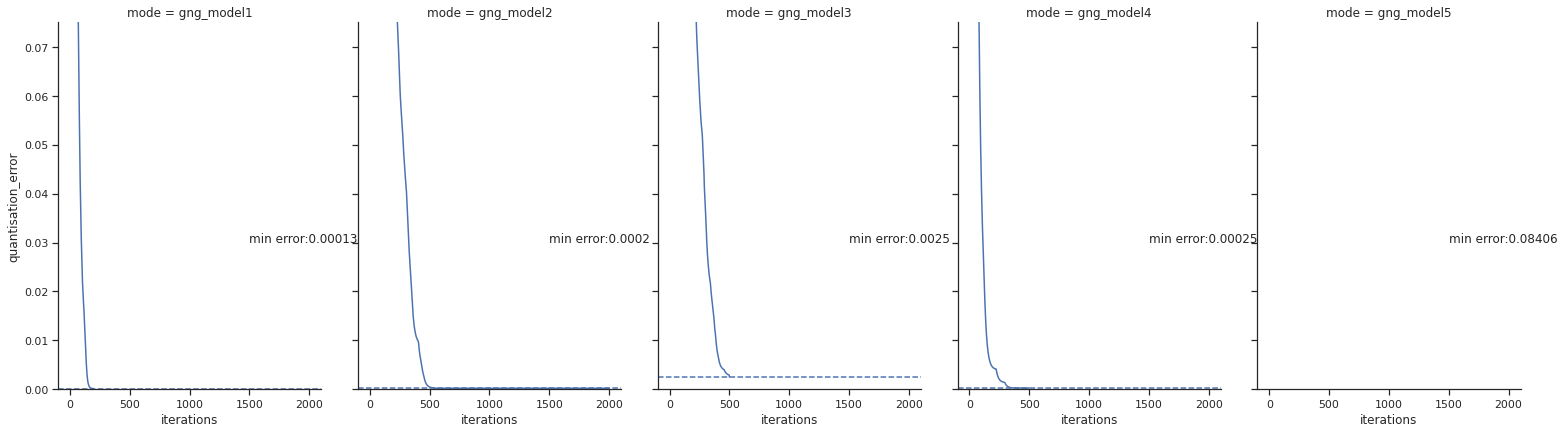

In [51]:
g = sns.FacetGrid(iris_model, col="mode")
g.map(sns.lineplot, "iterations", "quantisation_error")
g.fig.set_figwidth(22)
g.fig.set_figheight(8)


ax1, ax2, ax3, ax4, ax5 = g.axes[0]

ax1.axhline(iris_model.query('mode == "gng_model1"')['error_min'][0], ls='--')
ax2.axhline(iris_model.query('mode == "gng_model2"')['error_min'][0], ls='--')
ax3.axhline(iris_model.query('mode == "gng_model3"')['error_min'][0], ls='--')
ax4.axhline(iris_model.query('mode == "gng_model4"')['error_min'][0], ls='--')
ax5.axhline(iris_model.query('mode == "gng_model5"')['error_min'][0], ls='--')


ax1.set(ylim=(0.00, 0.075))
ax2.set(ylim=(0.00, 0.075))
ax3.set(ylim=(0.00, 0.075))
ax4.set(ylim=(0.00, 0.075))
ax5.set(ylim=(0.00, 0.075))

ax1.text(1500,0.03, "min error:" + str(round(iris_model.query('mode == "gng_model1"')['error_min'][0], 5)))
ax2.text(1500,0.03, "min error:" + str(round(iris_model.query('mode == "gng_model2"')['error_min'][0], 5)))
ax3.text(1500,0.03, "min error:" + str(round(iris_model.query('mode == "gng_model3"')['error_min'][0], 5)))
ax4.text(1500,0.03, "min error:" + str(round(iris_model.query('mode == "gng_model4"')['error_min'][0], 5)))
ax5.text(1500,0.03, "min error:" + str(round(iris_model.query('mode == "gng_model5"')['error_min'][0], 5)))